# Better Life Index: A Regression-Based Analysis


This notebook examines the exercise presented in Chapter 1 of the book. The objective is to construct a regression model to estimate each country's life satisfaction index using GDP per capita as the explanatory variable.

The analysis first replicates the author's original approach with 2020 data and then reconstructs the pipeline using updated data. At the time this notebook was produced, the most recent data available for both GDP and life satisfaction referred to 2024.

The workflow covers model construction, data collection, and dataset preparation.

The original data was found at:
[Better Life Index - OECD](https://data-explorer.oecd.org/vis?tenant=archive&df%5Bds%5D=DisseminateArchiveDMZ&df%5Bid%5D=DF_BLI&df%5Bag%5D=OECD&dq=...&to%5BTIME%5D=false)
[World Bank Data](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

## Experimental Setup


### Importing Libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from utils.save_fig import save_fig

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
data_root = 'https://github.com/ageron/data/raw/main/'
lifesat = pd.read_csv(data_root + 'lifesat/lifesat.csv')
lifesat


,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [3]:
lifesat.describe()


,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


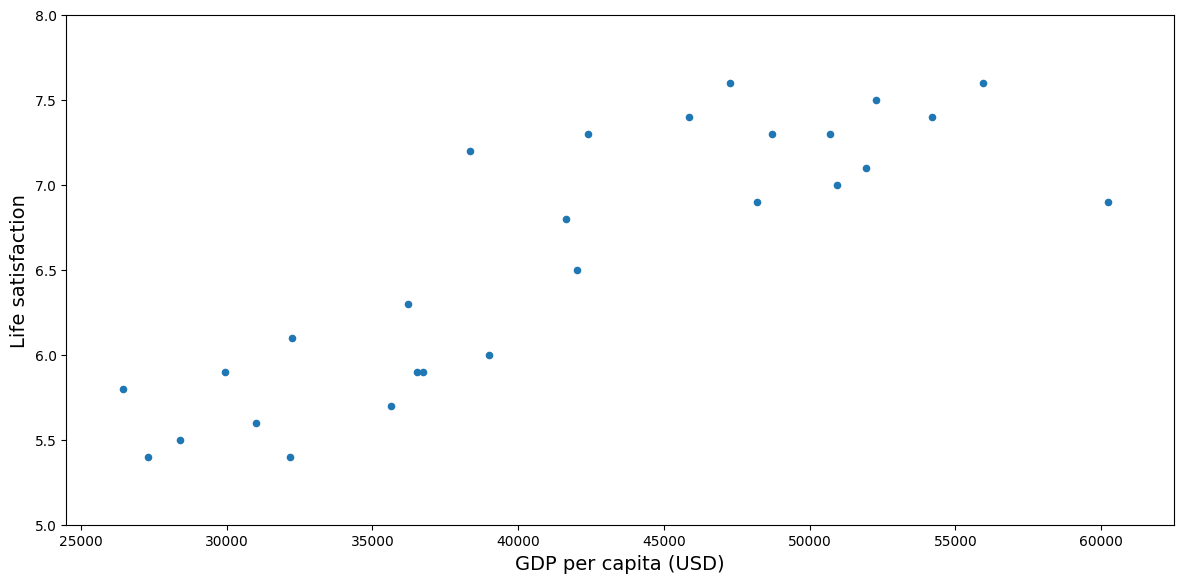

In [4]:
lifesat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', figsize=(12, 6))
plt.axis([24_500, 62_500, 5, 8])
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot')
plt.show()


### Initializing the Baseline Linear Regression Model


In [5]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat['Life satisfaction'].values

print(f"Sample X values: {X[:5].ravel()}")
print(f"Sample y values: {y[:5]}")

model = LinearRegression()
model.fit(X, y)


Sample X values: [26456.38793813 27287.08340093 28384.98778463 29932.49391006
 31007.76840654]
Sample y values: [5.8 5.4 5.5 5.9 5.6]


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


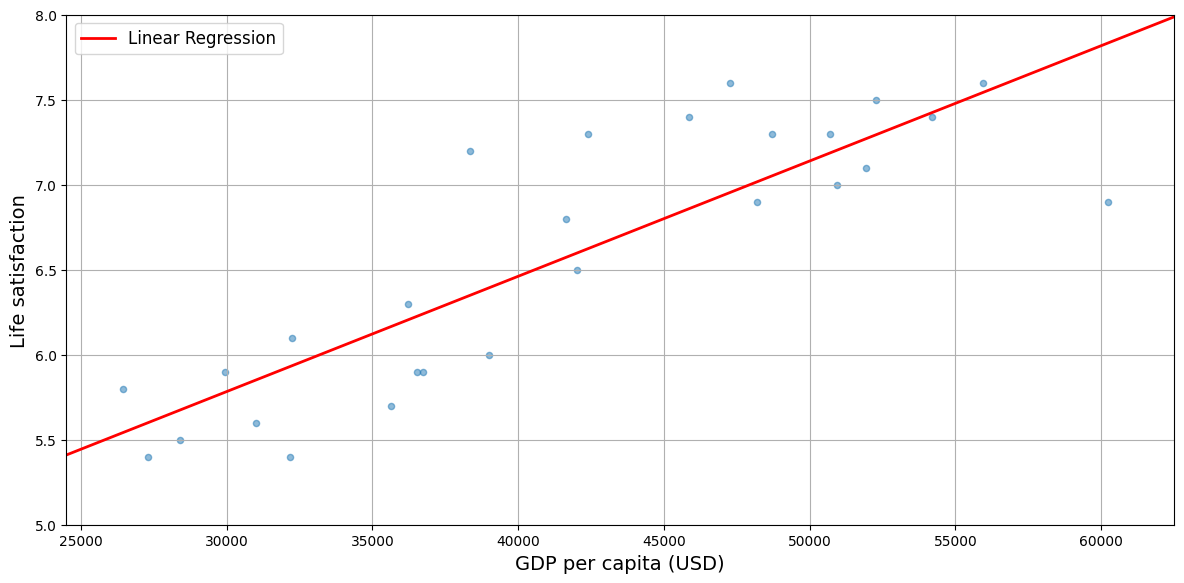

In [6]:
lifesat.plot(kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction', figsize=(12, 6), alpha=0.5)

X_line = np.linspace(24500, 62500, 1000).reshape(-1, 1)
y_line = model.predict(X_line)

plt.plot(X_line, y_line, color='red', linewidth=2, label="Linear Regression")

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.tight_layout()
save_fig('lifesat_gdp_linear_model')
plt.show()


After training the model, we perform the first prediction. Specifically, we estimate Cyprus's life satisfaction index using its 2020 GDP per capita (US$37,655.20).


In [7]:
X_new = [[37_655.2]]
cyprus_regression = model.predict(X_new)
print(cyprus_regression)


[6.30165767]


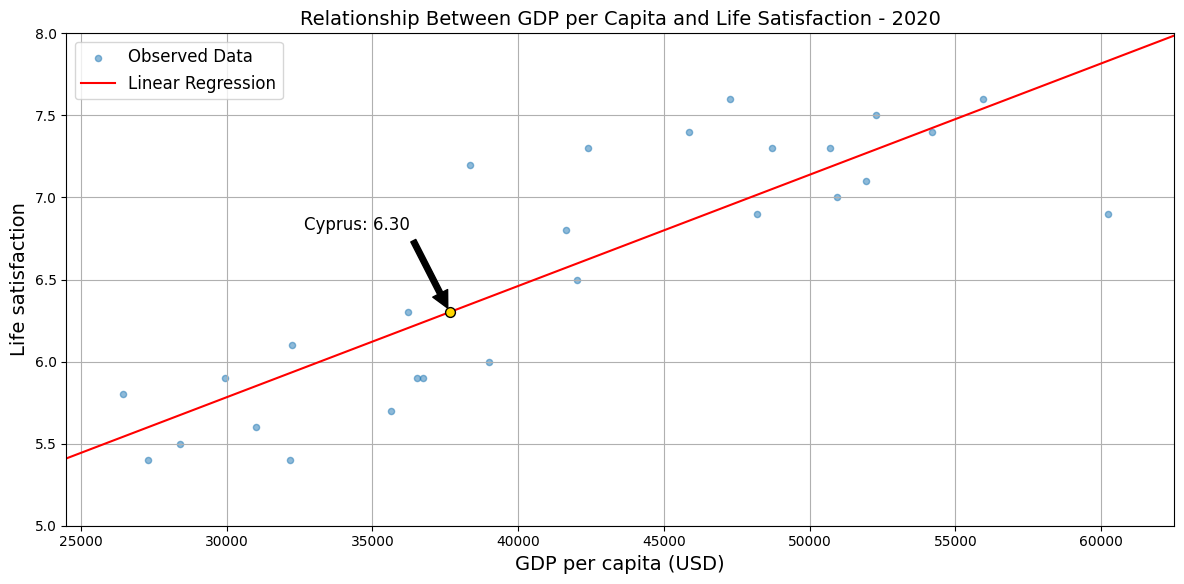

In [8]:
lifesat.plot(kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction', label='Observed Data', figsize=(12, 6), alpha=0.5)
X_line = np.linspace(24500, 62500, 1000).reshape(-1, 1)
plt.plot(X_line, model.predict(X_line), color='red',label="Linear Regression")

cyprus_gdp = 37655.2
cyprus_predicted_sat = model.predict([[cyprus_gdp]]).item()

plt.scatter(cyprus_gdp, cyprus_predicted_sat, color='gold', s=50, edgecolors='black', zorder=5)

plt.annotate(f"Cyprus: {cyprus_predicted_sat:.2f}", 
             xy=(cyprus_gdp, cyprus_predicted_sat), 
             xytext=(cyprus_gdp - 5000, cyprus_predicted_sat + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.title("Relationship Between GDP per Capita and Life Satisfaction - 2020")
plt.tight_layout()
save_fig('lifesat_gdp_linear_model_with_cyprus')
plt.show()


### Initializing the K-Nearest Neighbors Regressor


The author also introduces an instance-based learning algorithm. **KNeighborsRegressor** is a nearest-neighbors regression method (K-Nearest Neighbors) that predicts continuous outcomes rather than discrete categories.

Its mechanism is straightforward: to estimate the target value for a new observation, the method identifies the **K nearest points** in the training dataset and computes the mean of their target values. This mean is used as the prediction.

In the book, the model is configured with K = 3.


In [9]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)


In [10]:
model_knn.fit(X, y)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Predicting Cyprus's Life Satisfaction Value


In [11]:
cyprus_k_3 = model_knn.predict([[37_655.2]])
print(cyprus_k_3)


[6.33333333]


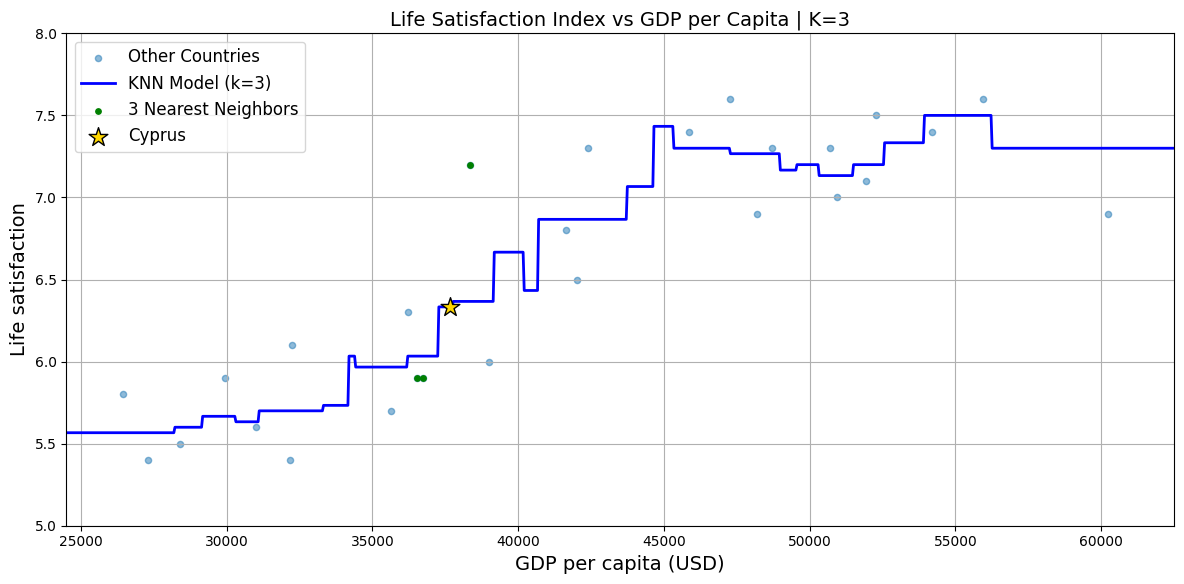

In [12]:
cyprus_gdp = [[37655.2]]
distances, indices = model_knn.kneighbors(cyprus_gdp)

X_smooth = np.linspace(24500, 62500, 1000).reshape(-1, 1)
y_knn_pred = model_knn.predict(X_smooth)

lifesat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', 
             grid=True, alpha=0.5, label="Other Countries", figsize=(12, 6))

plt.plot(X_smooth, y_knn_pred, color='blue', label='KNN Model (k=3)', linewidth=2)

plt.scatter(X[indices[0]], y[indices[0]], 
            color='green', s=15, label='3 Nearest Neighbors', zorder=4)

cyprus_pred = model_knn.predict(cyprus_gdp).item()
plt.scatter(cyprus_gdp, cyprus_pred, color='gold', marker='*', s=200, 
            edgecolors='black', label='Cyprus', zorder=5)

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.title("Life Satisfaction Index vs GDP per Capita | K=3")
plt.tight_layout()
save_fig('lifesat_gdp_knn_3_model_with_cyprus')
plt.show()


In [13]:
print('Prediction values for Cyprus:')
print(f'Linear Regression: {cyprus_regression[0]:.4f}')
print(f'KNN (k=3): {cyprus_k_3[0]:.4f}')


Prediction values for Cyprus:
Linear Regression: 6.3017
KNN (k=3): 6.3333


Differences between model outputs emerge from each method's inductive behavior. **Linear Regression** uses all training observations to estimate a global linear relationship, whereas **KNN** relies on local neighborhoods to estimate the target value of the observation being predicted. Consequently, evaluating multiple K values is essential to characterize KNN performance.


### Machine Learning Challenges: Training Data Quality


Model quality in machine learning is directly determined by data quality. In this context, quality is primarily associated with representativeness and sample size.

For robust generalization, training data must adequately represent future cases. The model constructed above provides an example of non-representative training data, as it was fit on GDP per capita values restricted to the $25,000.00-$60,000.00 interval, excluding countries outside that range.

If the model is trained on the full dataset, the fitted line changes and, therefore, its slope changes as well.

This effect is examined below.


## Retrieving the Full Dataset


We now retrain the previous model using a broader GDP interval and a larger sample, while still restricting the analysis to 2020 data.


In [14]:
import urllib.request
from pathlib import Path

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)


Loading OECD Better Life Index data


In [15]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
oecd_bli.head()


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


Loading World Bank GDP per capita data


In [16]:
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")
gdp_per_capita.head()


,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


Filtering data for the year 2020


In [17]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = 'Life satisfaction'

gdp_per_capita = gdp_per_capita[gdp_per_capita['Year'] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(['Code','Year'], axis=1)
gdp_per_capita.columns = ['Country', gdppc_col]
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head()


,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


We filter the OECD dataset to retain TOTAL values, since the records are disaggregated into TOTAL, MEN, WOMEN, HIGH, and LOW.


In [18]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


The OECD dataset contains 36 listed countries


In [19]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[lifesat_col, gdppc_col]]

print(f"Total countries: {len(full_country_stats)}")
full_country_stats.head()


Total countries: 36


,Life satisfaction,GDP per capita (USD)
Country,,
South Africa,4.7,11466.189672
Colombia,6.3,13441.492952
Brazil,6.4,14063.982505
Mexico,6.5,17887.750736
Chile,6.5,23324.524751


Filtering countries with GDP between $23,500.00 and $62,500.00


In [20]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) & 
                                   (full_country_stats[gdppc_col] <= max_gdp)]

print(f"Total countries in selected range: {len(country_stats)}")
country_stats.head()


Total countries in selected range: 27


,Life satisfaction,GDP per capita (USD)
Country,,
Russia,5.8,26456.387938
Greece,5.4,27287.083401
Turkey,5.5,28384.987785
Latvia,5.9,29932.493910
Hungary,5.6,31007.768407


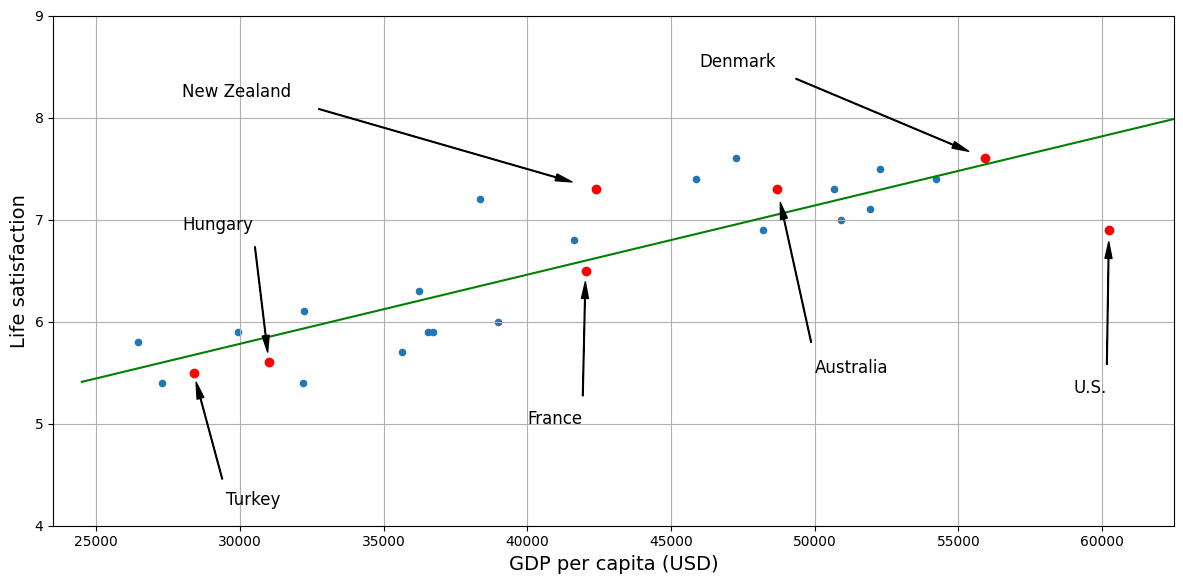

In [21]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, figsize=(12, 6))

min_lifesat = 4
max_lifesat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats.loc[country, gdppc_col]
    pos_data_y = country_stats.loc[country, lifesat_col]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, 
                 xy=(pos_data_x, pos_data_y), 
                 xytext=pos_text,
                 arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
    
plt.plot(X_line, model.predict(X_line), color='green',label="Linear Regression")

    
plt.axis([min_gdp, max_gdp, min_lifesat, max_lifesat])
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_annotations')
plt.show()

In [22]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)


,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


In [23]:
X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")


θ0=3.75, θ1=6.78e-05


In [24]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita


np.float64(37655.1803457421)

In [25]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction


np.float64(6.301656332738056)

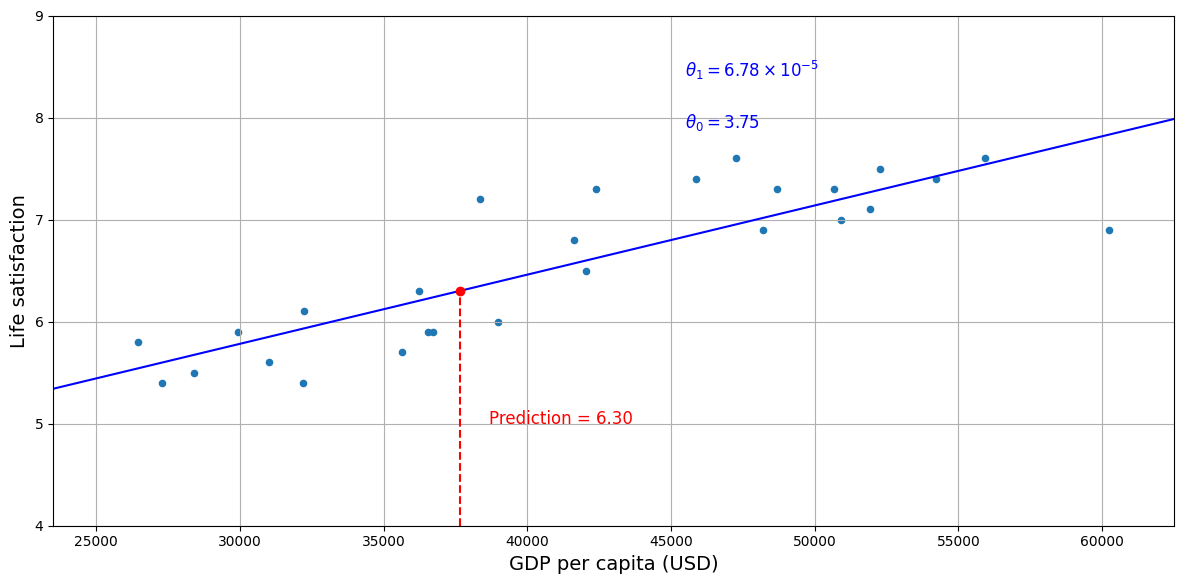

In [26]:
country_stats.plot(kind='scatter', figsize=(12, 6), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_lifesat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_lifesat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_lifesat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_lifesat, max_lifesat])
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_regression_line_and_cyprus_prediction')
plt.show()


In [27]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data


,Life satisfaction,GDP per capita (USD)
Country,,
South Africa,4.7,11466.189672
Colombia,6.3,13441.492952
Brazil,6.4,14063.982505
Mexico,6.5,17887.750736
Chile,6.5,23324.524751
Norway,7.6,63585.903514
Switzerland,7.5,68393.306004
Ireland,7.0,89688.956958
Luxembourg,6.9,110261.157353


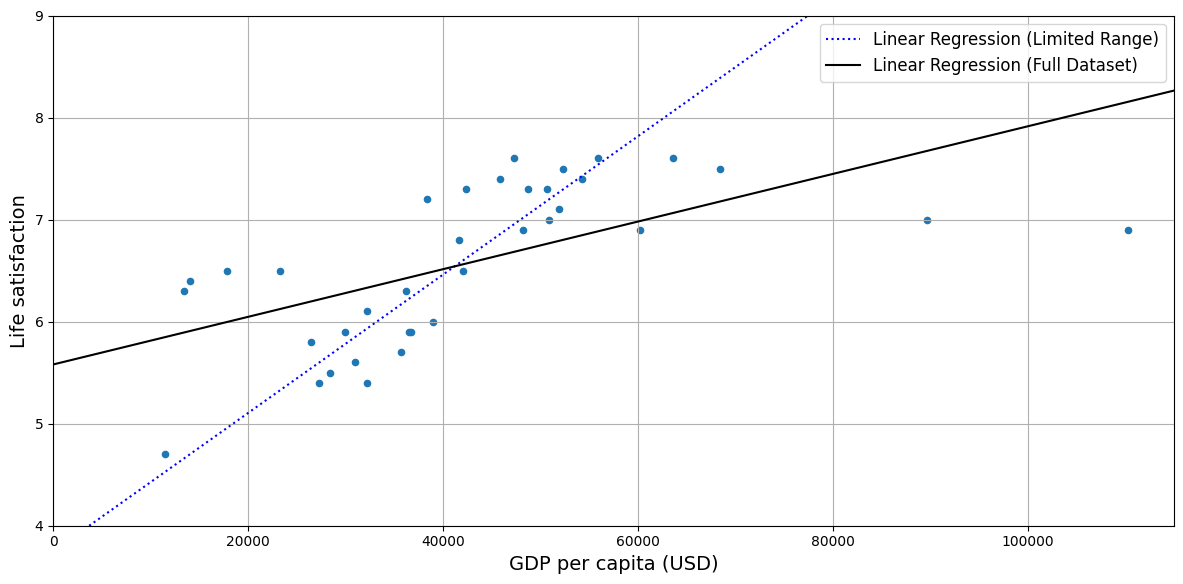

In [28]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

full_country_stats.plot(kind='scatter', figsize=(12, 6),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:", label="Linear Regression (Limited Range)")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k", label="Linear Regression (Full Dataset)")

plt.axis([0, 115_000, min_lifesat, max_lifesat])
plt.legend()
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_full_regression_line')
plt.show()


The chart above illustrates the representativeness issue discussed previously. Representative data is fundamental when the objective is to produce generalized predictions.

If the sample is too small, estimates are highly sensitive to noise. Conversely, a large sample may still be unrepresentative of the broader population. In both cases, it is necessary to identify potential outliers and verify whether specific observations are inconsistent with the underlying data-generating context.


### Low-Quality Data


Data preprocessing is a critical prerequisite for building reliable machine learning models. In practice, this stage typically requires the greatest share of analytical effort.

At this stage, the objective is to identify structural patterns, determine which observations are outliers, and understand the distributional properties of the dataset.

When clearly atypical observations are detected, removing them may improve model behavior; alternatively, transformation or robust treatment strategies may be more appropriate.

When missing values are present, one must decide whether to remove the entire variable, exclude only null observations, impute using summary statistics (for example, mean or median), or compare model variants with and without the affected variable.


### Regularization


Regularization refers to constraining model complexity in order to reduce overfitting risk. The goal is to balance goodness of fit and parsimony so that the model remains capable of generalization.

**Ridge Regression** extends linear regression by adding a penalty term to the sum of squared coefficients, rather than minimizing only the residual sum of squares.

By shrinking large coefficients, the model becomes less sensitive to noise in limited samples. In small datasets, this reduces the influence of outliers on extreme slopes and mitigates multicollinearity, yielding a more stable fit.


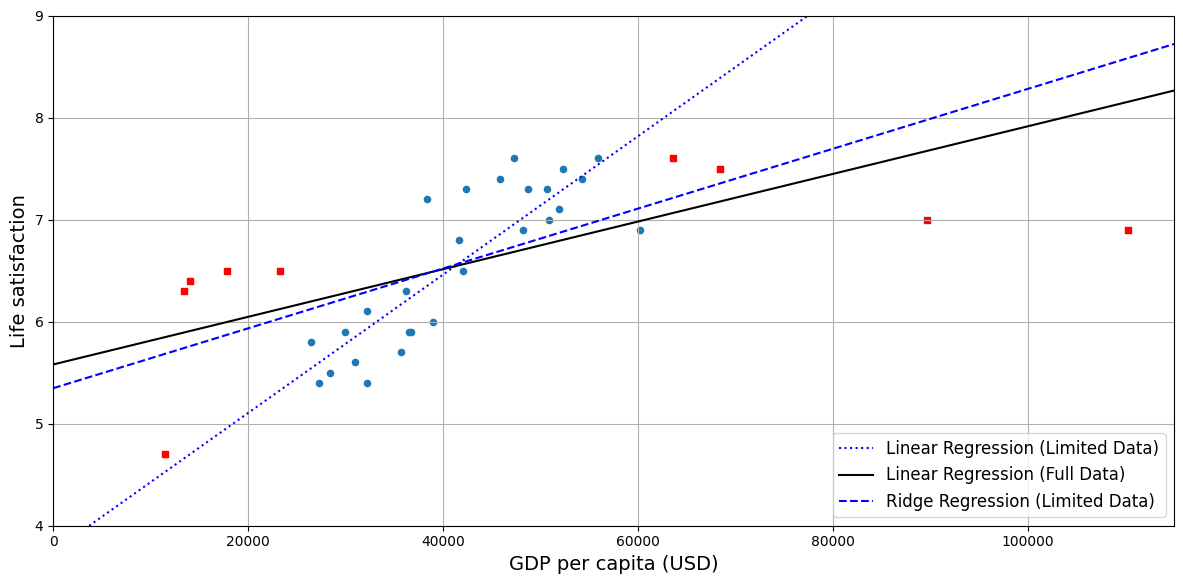

In [29]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(12, 6), grid=True)
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear Regression (Limited Data)")
plt.plot(X, t0full + t1full * X, "k-", label="Linear Regression (Full Data)")

ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Ridge Regression (Limited Data)")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_lifesat, max_lifesat])
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_full_and_ridge_regression_lines')
plt.show()


# Model Update


Having replicated the original exercise, we now reconstruct the pipeline from scratch with updated data, evaluate alternative strategies, and discuss how the model can be applied in practical settings.

This section includes:

* Data collection
* Data preparation
* Exploratory analysis
* Model development


## Data Acquisition


### OECD Better Life Index


In [30]:
import requests

url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_BLI,/all?dimensionAtObservation=AllDimensions'
headers = {'Accept': 'application/json'}

r = requests.get(url, headers=headers)

if r.status_code == 200:
    data = r.json()
    print("Success!")
else:
    print(f"Error {r.status_code}: {r.text[:200]}")


Success!


### JSON Exploration


In [31]:
data.keys()


dict_keys(['header', 'dataSets', 'structure'])

In [32]:
data['header']


{'id': 'IREF000308',
 'prepared': '2026-02-18T00:52:30Z',
 'test': False,
 'sender': {'id': 'Archive', 'name': 'unknown'}}

In [33]:
data['dataSets'][0].keys()


dict_keys(['action', 'observations'])

In [34]:
data['dataSets'][0]['observations']


{'0:0:0': [2.3, 0, 0, 0, None],
 '1:0:0': [2.4, 0, 0, 0, None],
 '2:0:0': [3.8, 0, 0, 0, None],
 '3:0:0': [2.3, 0, 0, 0, None],
 '4:0:0': [4.5, 0, 0, 0, None],
 '5:0:0': [2.2, 0, 0, 0, None],
 '6:0:0': [3.1, 0, 0, 0, None],
 '7:0:0': [1.4, 0, 0, 0, None],
 '8:0:0': [21.7, 0, 0, 0, None],
 '9:0:0': [3.8, 0, 0, 0, None],
 '10:0:0': [1, 0, 0, 0, None],
 '11:0:0': [2.6, 0, 0, 0, None],
 '12:0:0': [8.6, 0, 0, 0, None],
 '13:0:0': [2.7, 0, 0, 0, None],
 '14:0:0': [2.9, 0, 0, 0, None],
 '15:0:0': [2.2, 0, 0, 0, None],
 '16:0:0': [4, 0, 0, 0, None],
 '17:0:0': [2.5, 0, 0, 0, None],
 '18:0:0': [4.5, 0, 0, 0, None],
 '19:0:0': [2.8, 0, 0, 0, None],
 '20:0:0': [5, 0, 0, 0, None],
 '21:0:0': [8.1, 0, 0, 0, None],
 '22:0:0': [8.8, 0, 0, 0, None],
 '23:0:0': [15.8, 0, 0, 0, None],
 '24:0:0': [4.4, 0, 0, 0, None],
 '25:0:0': [13, 0, 0, 0, None],
 '26:0:0': [3.3, 0, 0, 0, None],
 '27:0:0': [4.2, 0, 0, 0, None],
 '28:0:0': [7, 0, 0, 0, None],
 '29:0:0': [5.4, 0, 0, 0, None],
 '30:0:0': [4.6, 0, 0, 0, N

In [35]:
data['structure'].keys()


dict_keys(['name', 'description', 'dimensions', 'attributes', 'annotations'])

In [36]:
data['structure']['name']


'Better Life Index'

In [37]:
data['structure']['description']


''

In [38]:
data['structure']['dimensions'].keys()


dict_keys(['dataset', 'series', 'observation'])

In [39]:
data['structure']['dimensions']['dataset']


[]

In [40]:
data['structure']['dimensions']['series']


[]

In [41]:
data['structure']['dimensions']['observation'][0].keys()


dict_keys(['id', 'name', 'keyPosition', 'role', 'values'])

In [42]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['id'])


LOCATION
INDICATOR
MEASURE
INEQUALITY


In [43]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['name'])


Country
Indicator
Measure
Inequality


In [44]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['keyPosition'])


0
1
2
3


In [45]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['role'])


LOCATION
INDICATOR
MEASURE
INEQUALITY


In [46]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['values'])


[{'id': 'AUT', 'name': 'Austria'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'CAN', 'name': 'Canada'}, {'id': 'CZE', 'name': 'Czechia'}, {'id': 'DNK', 'name': 'Denmark'}, {'id': 'FIN', 'name': 'Finland'}, {'id': 'FRA', 'name': 'France'}, {'id': 'DEU', 'name': 'Germany'}, {'id': 'GRC', 'name': 'Greece'}, {'id': 'HUN', 'name': 'Hungary'}, {'id': 'ISL', 'name': 'Iceland'}, {'id': 'IRL', 'name': 'Ireland'}, {'id': 'ITA', 'name': 'Italy'}, {'id': 'JPN', 'name': 'Japan'}, {'id': 'KOR', 'name': 'Korea'}, {'id': 'LUX', 'name': 'Luxembourg'}, {'id': 'MEX', 'name': 'Mexico'}, {'id': 'NLD', 'name': 'Netherlands'}, {'id': 'NZL', 'name': 'New Zealand'}, {'id': 'NOR', 'name': 'Norway'}, {'id': 'POL', 'name': 'Poland'}, {'id': 'PRT', 'name': 'Portugal'}, {'id': 'SVK', 'name': 'Slovak Republic'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'SWE', 'name': 'Sweden'}, {'id': 'TUR', 'name': 'Türkiye'}, {'id': 'GBR', 'name': 'United Kingdom'}, {'id': 'USA', 'name': 'United States'}, {'id': 'CHL', 'name': 'Chile'

In [47]:
observations = data['dataSets'][0]['observations']
dims = data['structure']['dimensions']['observation']

map_list = {d['keyPosition']: d['values'] for d in dims}


In [48]:
map_list[0]


[{'id': 'AUT', 'name': 'Austria'},
 {'id': 'BEL', 'name': 'Belgium'},
 {'id': 'CAN', 'name': 'Canada'},
 {'id': 'CZE', 'name': 'Czechia'},
 {'id': 'DNK', 'name': 'Denmark'},
 {'id': 'FIN', 'name': 'Finland'},
 {'id': 'FRA', 'name': 'France'},
 {'id': 'DEU', 'name': 'Germany'},
 {'id': 'GRC', 'name': 'Greece'},
 {'id': 'HUN', 'name': 'Hungary'},
 {'id': 'ISL', 'name': 'Iceland'},
 {'id': 'IRL', 'name': 'Ireland'},
 {'id': 'ITA', 'name': 'Italy'},
 {'id': 'JPN', 'name': 'Japan'},
 {'id': 'KOR', 'name': 'Korea'},
 {'id': 'LUX', 'name': 'Luxembourg'},
 {'id': 'MEX', 'name': 'Mexico'},
 {'id': 'NLD', 'name': 'Netherlands'},
 {'id': 'NZL', 'name': 'New Zealand'},
 {'id': 'NOR', 'name': 'Norway'},
 {'id': 'POL', 'name': 'Poland'},
 {'id': 'PRT', 'name': 'Portugal'},
 {'id': 'SVK', 'name': 'Slovak Republic'},
 {'id': 'ESP', 'name': 'Spain'},
 {'id': 'SWE', 'name': 'Sweden'},
 {'id': 'TUR', 'name': 'Türkiye'},
 {'id': 'GBR', 'name': 'United Kingdom'},
 {'id': 'USA', 'name': 'United States'},
 {

In [49]:
map_list[1]


[{'id': 'JE_LMIS', 'name': 'Labour market insecurity'},
 {'id': 'HO_BASE', 'name': 'Dwellings without basic facilities'},
 {'id': 'PS_FSAFEN', 'name': 'Feeling safe walking alone at night'},
 {'id': 'HO_HISH', 'name': 'Housing expenditure'},
 {'id': 'JE_EMPL', 'name': 'Employment rate'},
 {'id': 'JE_LTUR', 'name': 'Long-term unemployment rate'},
 {'id': 'SC_SNTWS', 'name': 'Quality of support network'},
 {'id': 'ES_EDUA', 'name': 'Educational attainment'},
 {'id': 'EQ_WATER', 'name': 'Water quality'},
 {'id': 'CG_VOTO', 'name': 'Voter turnout'},
 {'id': 'HS_SFRH', 'name': 'Self-reported health'},
 {'id': 'WL_EWLH', 'name': 'Employees working very long hours'},
 {'id': 'CG_SENG',
  'name': 'Stakeholder engagement for developing regulations'},
 {'id': 'ES_STCS', 'name': 'Student skills'},
 {'id': 'SW_LIFS', 'name': 'Life satisfaction'},
 {'id': 'HO_NUMR', 'name': 'Rooms per person'},
 {'id': 'IW_HADI', 'name': 'Household net adjusted disposable income'},
 {'id': 'IW_HNFW', 'name': 'House

In [50]:
map_list[2]


[{'id': 'L', 'name': 'Value'}]

In [51]:
map_list[3]


[{'id': 'TOT', 'name': 'Total'},
 {'id': 'WMN', 'name': 'Women'},
 {'id': 'MN', 'name': 'Men'},
 {'id': 'LW', 'name': 'Low'},
 {'id': 'HGH', 'name': 'High'}]

### Dataset Construction


In [52]:
countries = {i: v['name'] for i, v in enumerate(dims[0]['values'])}
indicators = {i: v['name'] for i, v in enumerate(dims[1]['values'])}
inequalities = {i: v['name'] for i, v in enumerate(dims[3]['values'])}

rows = []
for key, val in observations.items():
    indices = [int(i) for i in key.split(':')]
    
    inequality_idx = indices[3] if len(indices) > 3 else 0
    
    if inequalities[inequality_idx] == 'Total':
        rows.append({
            'Country': countries[indices[0]],
            'Indicator': indicators[indices[1]],
            'Value': val[0]
        })


In [53]:
df_oecd = pd.DataFrame(rows)
df_oecd.head()


,Country,Indicator,Value
0,Austria,Labour market insecurity,2.3
1,Belgium,Labour market insecurity,2.4
2,Canada,Labour market insecurity,3.8
3,Czechia,Labour market insecurity,2.3
4,Denmark,Labour market insecurity,4.5


In [54]:
oecd = df_oecd.pivot(index="Country", columns="Indicator", values="Value")

df_oecd = oecd.reset_index(drop=True)

oecd.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,6.1,69.0,81.0,0.6,37433.0,528768.0,19.4,...,55206.0,96.0,NaN,84.0,2.7,460.0,13.65,92.0,91.0,21.0
Austria,12.2,0.8,83.0,2.4,68.0,82.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,61.0,1.3,440.0,14.31,76.0,92.0,17.0
Belgium,12.8,0.7,81.0,2.6,61.0,47.0,0.8,34884.0,447607.0,20.0,...,54327.0,88.0,2.1,57.0,2.0,440.0,15.33,88.0,77.0,20.0
Brazil,11.7,6.7,60.0,3.6,47.0,34.0,3.3,NaN,NaN,NaN,...,NaN,86.0,NaN,NaN,2.2,373.0,NaN,80.0,71.0,16.0
Canada,7.1,0.2,94.0,1.2,67.0,67.0,0.7,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,81.0,2.9,485.0,14.47,68.0,87.0,17.0


In [55]:
oecd.transpose()


Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
Indicator,,,,,,,,,,,,,,,,,,,,,
Air pollution,6.70,12.20,12.80,11.7,7.10,23.4,22.6,17.5,17.0,10.0,...,11.8,18.5,17.0,28.5,10.00,5.8,10.1,27.10,10.10,7.70
Dwellings without basic facilities,NaN,0.80,0.70,6.7,0.20,9.4,12.3,2.3,0.5,0.5,...,13.8,1.5,0.2,35.9,0.30,0.0,0.0,4.90,0.50,0.10
Educational attainment,84.00,83.00,81.00,60.0,94.00,68.0,61.0,44.0,93.0,83.0,...,96.0,92.0,91.0,48.0,66.00,85.0,88.0,38.00,83.00,92.00
Employees working very long hours,6.10,2.40,2.60,3.6,1.20,5.0,17.1,12.7,2.0,0.1,...,0.1,2.0,2.9,10.4,1.40,0.5,0.3,20.10,6.30,6.60
Employment rate,69.00,68.00,61.00,47.0,67.00,47.0,45.0,41.0,67.0,71.0,...,65.0,62.0,68.0,33.0,57.00,74.0,76.0,30.00,72.00,62.00
Feeling safe walking alone at night,81.00,82.00,47.00,34.0,67.00,30.0,45.0,36.0,77.0,77.0,...,55.0,67.0,85.0,35.0,75.00,68.0,81.0,45.00,77.00,69.00
Homicide rate,0.60,0.50,0.80,3.3,0.70,0.7,4.1,1.8,0.6,0.4,...,2.2,0.6,0.3,3.6,0.50,0.5,0.3,0.50,0.10,2.50
Household net adjusted disposable income,37433.00,37001.00,34884.00,NaN,34421.00,NaN,NaN,16517.0,26664.0,33774.0,...,19546.0,21149.0,25250.0,9338.0,27155.00,33730.0,39697.0,NaN,33049.00,51147.00
Household net wealth,528768.00,309637.00,447607.00,NaN,478240.00,135787.0,NaN,NaN,NaN,149864.0,...,NaN,171425.0,233286.0,NaN,366534.00,NaN,NaN,NaN,524422.00,684500.00


In [56]:
oecd_mean = oecd.transpose()
oecd_mean['Mean'] = oecd_mean.mean(axis=1)
oecd_mean['Mean'].round(2)


Indicator
Air pollution                                            13.52
Dwellings without basic facilities                        4.26
Educational attainment                                   78.98
Employees working very long hours                         4.35
Employment rate                                          62.21
Feeling safe walking alone at night                      65.07
Homicide rate                                             1.05
Household net adjusted disposable income              29598.58
Household net wealth                                 323959.63
Housing expenditure                                      20.35
Labour market insecurity                                  5.18
Life expectancy                                          83.00
Life satisfaction                                         6.57
Long-term unemployment rate                               2.35
Personal earnings                                     43933.06
Quality of support network                   

#### Saving the Dataset


In [58]:
oecd.to_csv('../datasets/oecd/oecd_bli_2024.csv')

### World Bank GDP per Capita


In [59]:
import requests
import zipfile
import io
import pandas as pd

url = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv'

response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    csv_files = [f for f in z.namelist() if f.startswith('API')]
    
    if csv_files:
        target_file = csv_files[0]
        with z.open(target_file) as f:
            df_gdp = pd.read_csv(f, skiprows=4)


In [60]:
df_gdp.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.550214,28440.041688,30082.158423,30645.890602,22759.807175,26749.329609,30975.998912,35718.753119,39498.594129,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448,NaN


### Dataset Construction


In [61]:
years = [str(year) for year in range(1960, 2026) if str(year) in df_gdp.columns]

gdp = df_gdp.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=years,
    var_name='Year',
    value_name='GDP per capita (USD)'
)

gdp.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'}, inplace=True)

gdp['Year'] = gdp['Year'].astype(int)
gdp = gdp.sort_values(by=['Entity', 'Year']).reset_index(drop=True)
gdp.dropna(subset=['GDP per capita (USD)'], inplace=True)
gdp


,Entity,Code,Year,GDP per capita (USD)
40,Afghanistan,AFG,2000,174.930991
41,Afghanistan,AFG,2001,138.706822
42,Afghanistan,AFG,2002,178.954088
43,Afghanistan,AFG,2003,198.871116
44,Afghanistan,AFG,2004,221.763654
...,...,...,...,...
17285,Zimbabwe,ZWE,2020,2059.674454
17286,Zimbabwe,ZWE,2021,2613.605421
17287,Zimbabwe,ZWE,2022,2536.400502
17288,Zimbabwe,ZWE,2023,2195.224921


### Saving the Dataset


In [63]:
gdp.to_csv('../datasets/world_bank/gdp_per_capita_2024.csv', index=False)


## Data Preparation for Analysis and Model Development


In [65]:
lifesat = pd.read_csv(Path('../datasets/oecd/oecd_bli_2024.csv'))
lifesat.head()


,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,6.7,NaN,84.0,6.1,69.0,81.0,0.6,37433.0,528768.0,...,55206.0,96.0,NaN,84.0,2.7,460.0,13.65,92.0,91.0,21.0
1,Austria,12.2,0.8,83.0,2.4,68.0,82.0,0.5,37001.0,309637.0,...,53132.0,92.0,1.6,61.0,1.3,440.0,14.31,76.0,92.0,17.0
2,Belgium,12.8,0.7,81.0,2.6,61.0,47.0,0.8,34884.0,447607.0,...,54327.0,88.0,2.1,57.0,2.0,440.0,15.33,88.0,77.0,20.0
3,Brazil,11.7,6.7,60.0,3.6,47.0,34.0,3.3,NaN,NaN,...,NaN,86.0,NaN,NaN,2.2,373.0,NaN,80.0,71.0,16.0
4,Canada,7.1,0.2,94.0,1.2,67.0,67.0,0.7,34421.0,478240.0,...,55342.0,93.0,2.6,81.0,2.9,485.0,14.47,68.0,87.0,17.0


In [66]:
lifesat.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Air pollution,42.0,13.521429,6.316163,5.50,8.725,12.10,17.000,28.50
Dwellings without basic facilities,39.0,4.261538,7.491526,0.00,0.200,0.70,5.300,35.90
Educational attainment,41.0,78.975610,15.662835,38.00,74.000,83.00,91.000,96.00
Employees working very long hours,40.0,4.352500,4.943786,0.10,1.275,2.30,6.025,20.10
Employment rate,42.0,62.214286,11.742223,30.00,57.500,66.00,71.000,76.00
Feeling safe walking alone at night,42.0,65.071429,15.739329,30.00,56.750,68.50,77.000,89.00
Homicide rate,42.0,1.052381,1.181202,0.10,0.400,0.60,1.000,5.50
Household net adjusted disposable income,36.0,29598.583333,8753.975532,9338.00,23756.750,29459.50,34909.000,51147.00
Household net wealth,30.0,323959.633333,182301.797043,79245.00,198978.250,294877.50,369389.250,941162.00
Housing expenditure,38.0,20.350000,2.479402,14.70,18.400,20.30,21.775,27.40


In [68]:
gdp_raw = pd.read_csv(Path('../datasets/world_bank/gdp_per_capita_2024.csv'))
gdp = gdp_raw[gdp_raw['Year'] == 2024].copy()
print(f"Total countries/regions with GDP per capita data for 2024: {len(gdp)}")
gdp.head()


Total countries/regions with GDP per capita data for 2024: 240


,Entity,Code,Year,GDP per capita (USD)
88,Africa Eastern and Southern,AFE,2024,1615.396356
153,Africa Western and Central,AFW,2024,1411.337029
198,Albania,ALB,2024,11377.775743
263,Algeria,DZA,2024,5752.990767
339,Andorra,AND,2024,49303.649167


In [69]:
regions = ['Africa Eastern and Southern','Africa Western and Central','Arab World',
 'Caribbean small states','Central African Republic','Central Europe and the Baltics',
 'Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)','East Asia & Pacific (excluding high income)',
 'Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)','European Union',
 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA & IBRD total',
 'IDA blend','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income',
 'Middle East, North Africa, Afghanistan & Pakistan','Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)',
 'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)', 'Middle income', 'North America', 'OECD members', 'Other small states',
 'Pacific island small states','Post-demographic dividend','Pre-demographic dividend', 'Small states','South Africa','South Asia','South Asia (IDA & IBRD)',
 'Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)','Upper middle income','West Bank and Gaza','World'
 ]


Separating GDP observations into regions and countries


In [70]:
gdp_regions = gdp[gdp['Entity'].isin(regions)]
print(f"Total regions/groupings: {len(gdp_regions)}")
gdp_countries = gdp[~gdp['Entity'].isin(regions)]
print(f"Total countries with GDP per capita data for 2024: {len(gdp_countries)}")


Total regions/groupings: 51
Total countries with GDP per capita data for 2024: 189


Creating `df_raw` to match the dataset structure used in the original book exercise.


In [71]:
df_raw = pd.merge(lifesat[['Country','Life satisfaction']], gdp_countries, left_on='Country', right_on='Entity', how='inner')
df_raw.drop(columns=['Entity','Code', 'Year'], inplace=True)
print(f"Total countries matched across datasets: {len(df_raw)}")
df_raw.head()


Total countries matched across datasets: 37


,Country,Life satisfaction,GDP per capita (USD)
0,Australia,7.0,64603.985631
1,Austria,7.2,58268.878765
2,Belgium,6.7,56614.567950
3,Brazil,6.4,10310.548878
4,Canada,6.9,54340.347722


## Exploratory Analysis


In [72]:
df_raw.sort_values(by='GDP per capita (USD)',ascending=False)


,Country,Life satisfaction,GDP per capita (USD)
23,Luxembourg,7.4,137781.681659
17,Ireland,7.3,112894.953241
34,Switzerland,7.4,103998.186686
27,Norway,7.2,86785.433449
16,Iceland,7.8,86040.530985
36,United States,6.9,84534.040784
9,Denmark,7.5,71026.483227
25,Netherlands,7.4,67520.421896
0,Australia,7.0,64603.985631
1,Austria,7.2,58268.878765


In [73]:
df_raw.describe()


,Life satisfaction,GDP per capita (USD)
count,37.000000,37.000000
mean,6.729730,48866.928077
std,0.591545,29806.539967
min,5.700000,7919.208868
25%,6.200000,25992.674850
50%,6.700000,46103.084086
75%,7.200000,58268.878765
max,7.900000,137781.681659


In [74]:
gdp_countries.describe()


,Year,GDP per capita (USD)
count,189.0,189.000000
mean,2024.0,21600.899536
std,0.0,32437.637245
min,2024.0,219.424831
25%,2024.0,2727.893522
50%,2024.0,8317.633999
75%,2024.0,29384.018960
max,2024.0,288001.433369


The GDP per capita distribution shows substantial dispersion: the minimum value is US$219.42 and the maximum is US$288,991.43, a gap greater than 1,300-fold. The mean GDP per capita is approximately US$21,000.00. In addition, 75% of observations are below US$29,384.00, only moderately above the mean despite an extreme upper tail.

We now examine which countries present the highest GDP per capita values.


In [75]:
gdp_countries.sort_values(by='GDP per capita (USD)', ascending=False).head(10)


,Entity,Code,Year,GDP per capita (USD)
9126,Monaco,MCO,2024,288001.433369
1345,Bermuda,BMU,2024,142855.374714
8086,Luxembourg,LUX,2024,137781.681659
6428,Ireland,IRL,2024,112894.953241
12990,Switzerland,CHE,2024,103998.186686
11760,Singapore,SGP,2024,90674.066633
10099,Norway,NOR,2024,86785.433449
6110,Iceland,ISL,2024,86040.530985
13965,United States,USA,2024,84534.040784
11128,Qatar,QAT,2024,76688.694174


In [76]:
gdp_countries.sort_values(by='GDP per capita (USD)', ascending=True).head(10)


,Entity,Code,Year,GDP per capita (USD)
1864,Burundi,BDI,2024,219.424831
8239,Malawi,MWI,2024,522.570394
8194,Madagascar,MDG,2024,544.987501
12023,"Somalia, Fed. Rep.",SOM,2024,629.538899
2667,"Congo, Dem. Rep.",COD,2024,649.383339
9298,Mozambique,MOZ,2024,656.776825
9848,Niger,NER,2024,735.270256
11695,Sierra Leone,SLE,2024,806.654650
7684,Liberia,LBR,2024,851.497724
4742,"Gambia, The",GMB,2024,871.340292


This provides a clear example of representativeness limitations.

The three countries with the highest GDP per capita are small territories with very low populations. Luxembourg has fewer than one million inhabitants at the time of analysis, while Monaco and Bermuda each have fewer than one hundred thousand inhabitants.

By contrast, the three poorest countries in this list, starting with Burundi (the lowest GDP per capita), have much larger populations. Burundi alone has nearly fourteen million inhabitants. Compared with approximately forty thousand inhabitants in Monaco, this implies roughly 350 times more inhabitants with a GDP per capita about 1,300 times lower.

Training a general-purpose model on the full dataset is therefore difficult due to the high level of heterogeneity. A simple linear regression is unlikely to deliver strong predictive quality under these conditions.

Given the larger sample size (189 countries), KNN Regressor may offer a useful alternative because multiple K values can be evaluated.


# Reconstructing the Hands-On Machine Learning Baseline with Updated Data (2024)


To align the updated dataset with the configuration used in the book, we apply a filter that retains GDP per capita values between US$25,000.00 and US$61,000.00.


In [77]:
df = df_raw[(df_raw['GDP per capita (USD)'] > 25_000) & (df_raw['GDP per capita (USD)'] < 61_000)]


Of the 37 countries listed in the OECD data, only 20 fall within this interval.


In [78]:
print(f"Total countries in selected range: {len(df)}")


Total countries in selected range: 20


Initializing the regression model


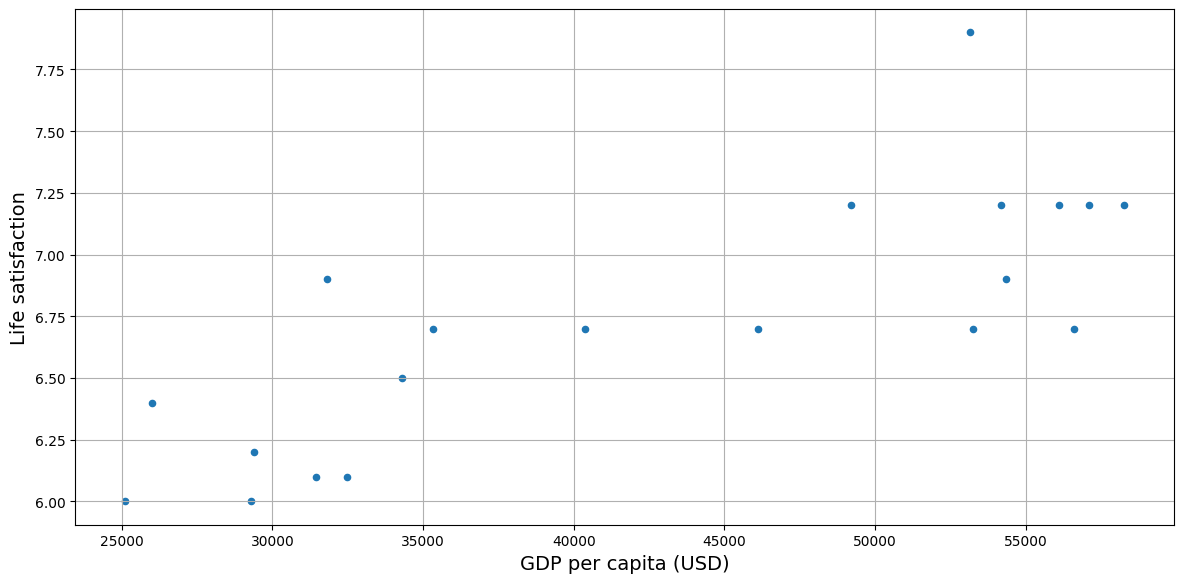

Sample X values: [58268.87876516 56614.5679499  54340.34772247 31823.30782906
 31428.35478161]
Sample y values: [7.2 6.7 6.9 6.9 6.1]


In [80]:
X = df[['GDP per capita (USD)']].values
y = df['Life satisfaction'].values

df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', grid=True, figsize=(12, 6))
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_2024')
plt.show()

model_regression = LinearRegression()
model_regression.fit(X, y)

print(f"Sample X values: {X[:5].ravel()}")
print(f"Sample y values: {y[:5]}")


In [81]:
t0 = np.atleast_1d(model_regression.intercept_)[0]
t1 = np.atleast_1d(model_regression.coef_.ravel())[0]
print(f"Line equation: Satisfaction = θ0 + θ1 * GDP per capita")
print(f"Line equation: Satisfaction = {t0:.2f} + {t1:.2e} * GDP per capita")


Line equation: Satisfaction = θ0 + θ1 * GDP per capita
Line equation: Satisfaction = 5.33 + 3.27e-05 * GDP per capita


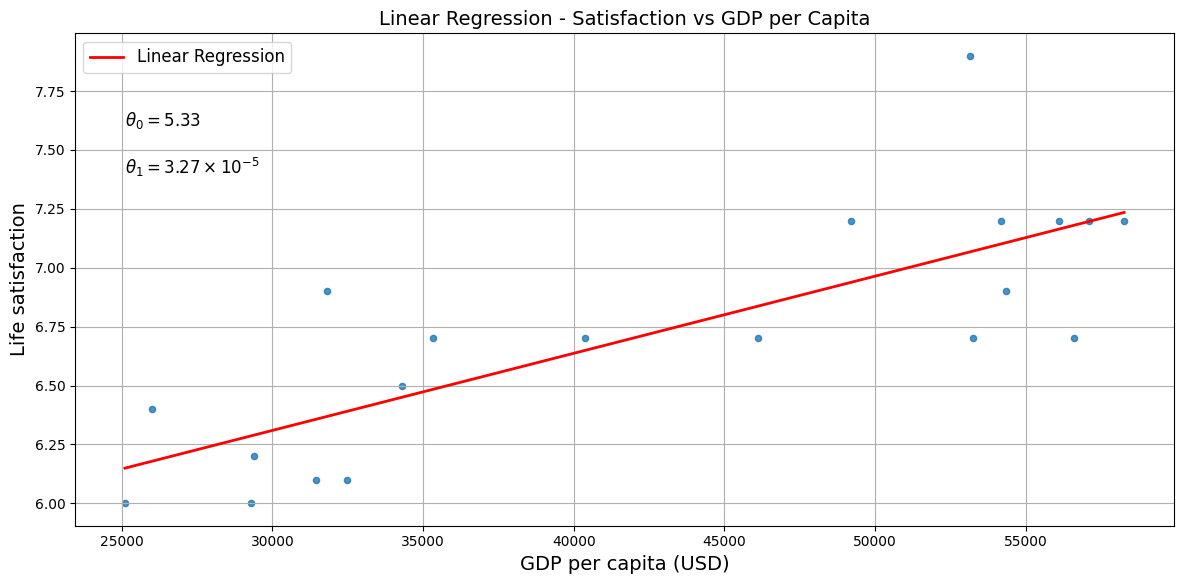

In [82]:
df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction',
        grid=True, figsize=(12, 6), alpha=0.8)

X_line = np.linspace(df['GDP per capita (USD)'].min(),
                     df['GDP per capita (USD)'].max(), 1000).reshape(-1, 1)
y_predict = model_regression.predict(X_line)

plt.plot(X_line, y_predict, color='red', linewidth=2, label="Linear Regression")

min_gdp = df['GDP per capita (USD)'].min()
max_lifesat = df['Life satisfaction'].max()

plt.text(min_gdp, max_lifesat - 0.30,
         fr"$\theta_0 = {t0:.2f}$", color="black", fontsize=12)
plt.text(min_gdp, max_lifesat - 0.5,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="black", fontsize=12)

plt.title('Linear Regression - Satisfaction vs GDP per Capita')
plt.legend()
save_fig('lifesat_gdp_scatterplot_with_regression_line_2024')
plt.tight_layout()
plt.show()


In [83]:
gdp_pc = gdp_countries.copy()
gdp_pc


,Entity,Code,Year,GDP per capita (USD)
198,Albania,ALB,2024,11377.775743
263,Algeria,DZA,2024,5752.990767
339,Andorra,AND,2024,49303.649167
384,Angola,AGO,2024,2665.874448
432,Antigua and Barbuda,ATG,2024,23542.452695
...,...,...,...,...
14179,Vanuatu,VUT,2024,3410.770232
14244,"Venezuela, RB",VEN,2024,4217.591026
14284,Viet Nam,VNM,2024,4717.290287
14495,Zambia,ZMB,2024,1187.109434


In [84]:
cyprus_gdp = (gdp_pc['GDP per capita (USD)'].loc[gdp_pc['Entity'] == 'Cyprus'].values[0])

cyprus_predicted_sat = model_regression.predict(cyprus_gdp.reshape(1, -1))
cyprus_predicted_sat = cyprus_predicted_sat.item()

print(f"Predicted satisfaction for Cyprus: {cyprus_predicted_sat:.2f}")


Predicted satisfaction for Cyprus: 6.59


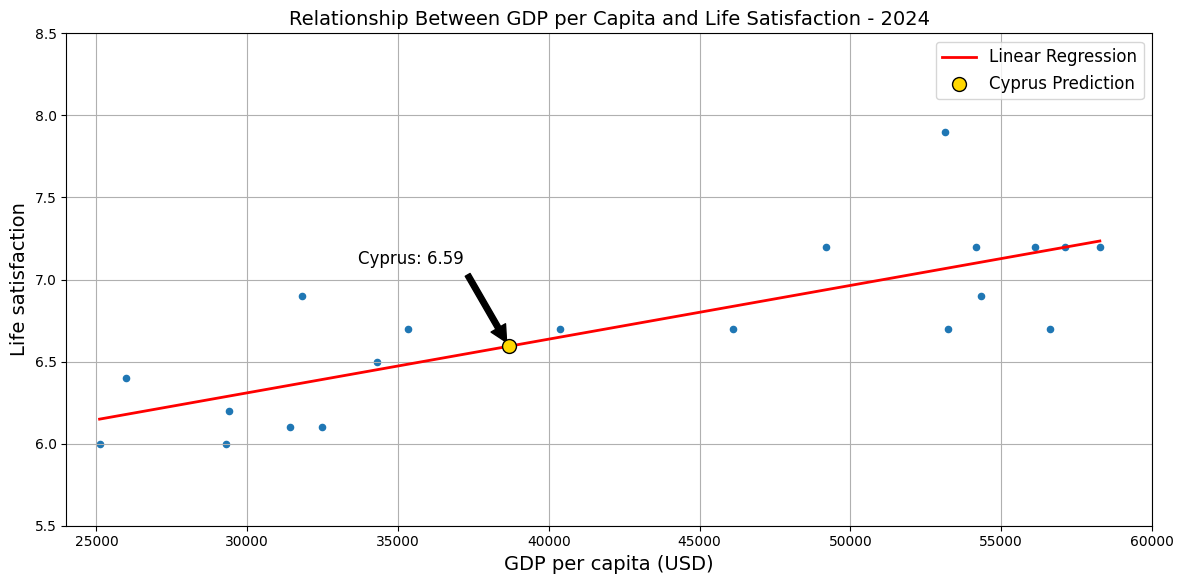

In [85]:
df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', grid=True, figsize=(12, 6))
plt.plot(X_line, y_predict, color='red', linewidth=2, label="Linear Regression")
plt.scatter(cyprus_gdp, cyprus_predicted_sat, color='gold', s=100, edgecolors='black', zorder=5, label='Cyprus Prediction')
plt.annotate(f"Cyprus: {cyprus_predicted_sat:.2f}", 
             xy=(cyprus_gdp, cyprus_predicted_sat), 
             xytext=(cyprus_gdp - 5000, cyprus_predicted_sat + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.axis([24000, 60000, 5.5, 8.5])
plt.legend()
plt.title("Relationship Between GDP per Capita and Life Satisfaction - 2024")
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_regression_line_and_cyprus_prediction_2024')
plt.show()


After four years, Cyprus's Satisfaction Index increased from 6.30 to 6.59. However, the fitted line slope also changed because both satisfaction and GDP per capita values evolved in the training set; some countries left the sample and others entered.


In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X, y)

model_knn.predict(cyprus_gdp.reshape(1, -1))

print(f"KNN prediction (k=3) for Cyprus 2024: {model_knn.predict(cyprus_gdp.reshape(1, -1))[0]:.2f}")


KNN prediction (k=3) for Cyprus 2024: 6.63


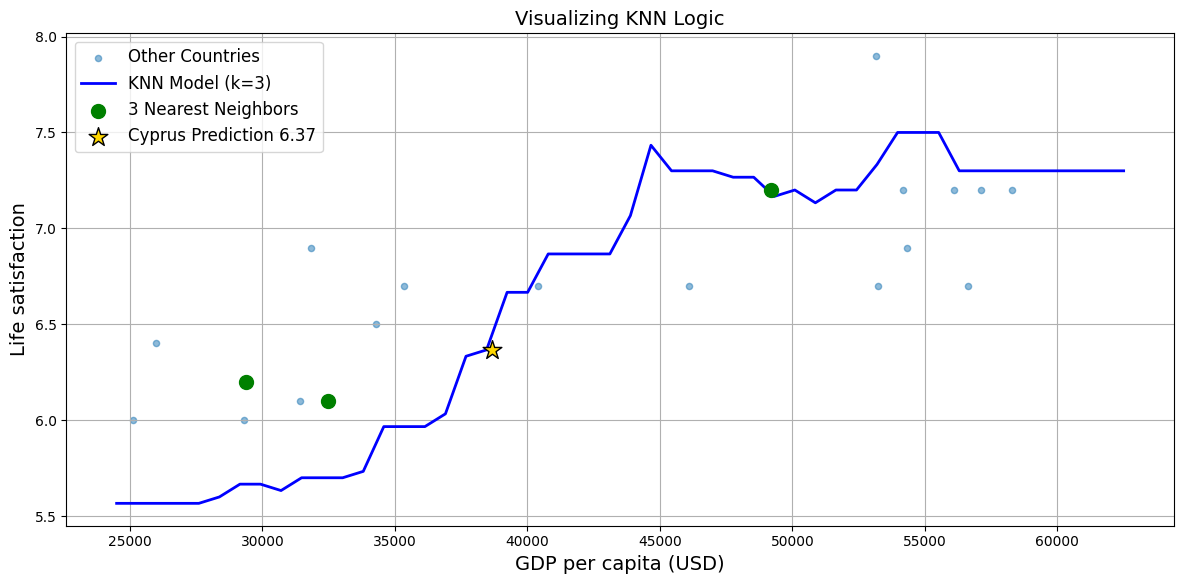

In [86]:
distances, indices = model_knn.kneighbors(cyprus_gdp.reshape(1, -1))

X_smooth = np.linspace(24500, 62500, 50).reshape(-1, 1)
y_knn_pred = model_knn.predict(X_smooth)

df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', 
             grid=True, alpha=0.5, label="Other Countries", figsize=(12, 6))

plt.plot(X_smooth, y_knn_pred, color='blue', label='KNN Model (k=3)', linewidth=2)

plt.scatter(X[indices[0]], y[indices[0]], 
            color='green', s=100, label='3 Nearest Neighbors', zorder=4)

cyprus_pred = model_knn.predict(cyprus_gdp.reshape(1, -1)).item()
plt.scatter(cyprus_gdp, cyprus_pred, color='gold', marker='*', s=200, 
            edgecolors='black', label=f'Cyprus Prediction {cyprus_pred:.2f}', zorder=5)

plt.legend()
plt.title("Visualizing KNN Logic")
plt.tight_layout()
save_fig('lifesat_gdp_knn_3_model_with_cyprus_2024')
plt.show()


KNN exhibits a similar pattern: the 2020 model predicted 6.33 points for Cyprus, whereas the updated model predicts 6.63.


We now isolate countries that fall within the analytical interval but are absent from the OECD list and therefore do not have observed Satisfaction Index values.


In [87]:
gdp_pc_filtered = gdp_countries[(gdp_countries['GDP per capita (USD)'] > 25_000) & (gdp_countries['GDP per capita (USD)'] < 60_000)]
gdp_pc_filtered.head()


,Entity,Code,Year,GDP per capita (USD)
339,Andorra,AND,2024,49303.649167
635,Aruba,ABW,2024,39498.594129
765,Austria,AUT,2024,58268.878765
865,"Bahamas, The",BHS,2024,39455.446655
920,Bahrain,BHR,2024,29653.568273


In [88]:
df.head()


,Country,Life satisfaction,GDP per capita (USD)
1,Austria,7.2,58268.878765
2,Belgium,6.7,56614.567950
4,Canada,6.9,54340.347722
8,Czechia,6.9,31823.307829
10,Estonia,6.1,31428.354782


In [89]:
missing_countries_filtered = gdp_pc_filtered[~gdp_pc_filtered['Entity'].isin(df['Country'])]

print(f"Total missing countries in selected range: {len(missing_countries_filtered)}")


Total missing countries in selected range: 18


In [90]:
missing_countries_filtered.head()


,Entity,Code,Year,GDP per capita (USD)
339,Andorra,AND,2024,49303.649167
635,Aruba,ABW,2024,39498.594129
865,"Bahamas, The",BHS,2024,39455.446655
920,Bahrain,BHR,2024,29653.568273
1050,Barbados,BRB,2024,26544.870728


In [91]:
X_missing_filtered = missing_countries_filtered[['GDP per capita (USD)']].values
print(f"Sample X values for missing countries: {X_missing_filtered[:5].ravel()}")


Sample X values for missing countries: [49303.64916743 39498.59412938 39455.44665485 29653.56827315
 26544.87072826]


In [92]:
missing_predictions_filtered = model_regression.predict(X_missing_filtered)


In [93]:
missing_countries_filtered['Predicted Life Satisfaction - Regression'] = missing_predictions_filtered.flatten().round(2)

results = missing_countries_filtered[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction - Regression']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predictions generated for {len(results)} countries.")
results


Predictions generated for 18 countries.


,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression
5663,"Hong Kong SAR, China",54074.692852,7.10
13835,United Arab Emirates,50273.506047,6.97
339,Andorra,49303.649167,6.94
8472,Malta,43898.578181,6.76
11776,Sint Maarten (Dutch part),41472.587450,6.69
635,Aruba,39498.594129,6.62
865,"Bahamas, The",39455.446655,6.62
11073,Puerto Rico (US),39343.715466,6.62
3023,Cyprus,38674.292969,6.59
13623,Turks and Caicos Islands,37506.779843,6.56


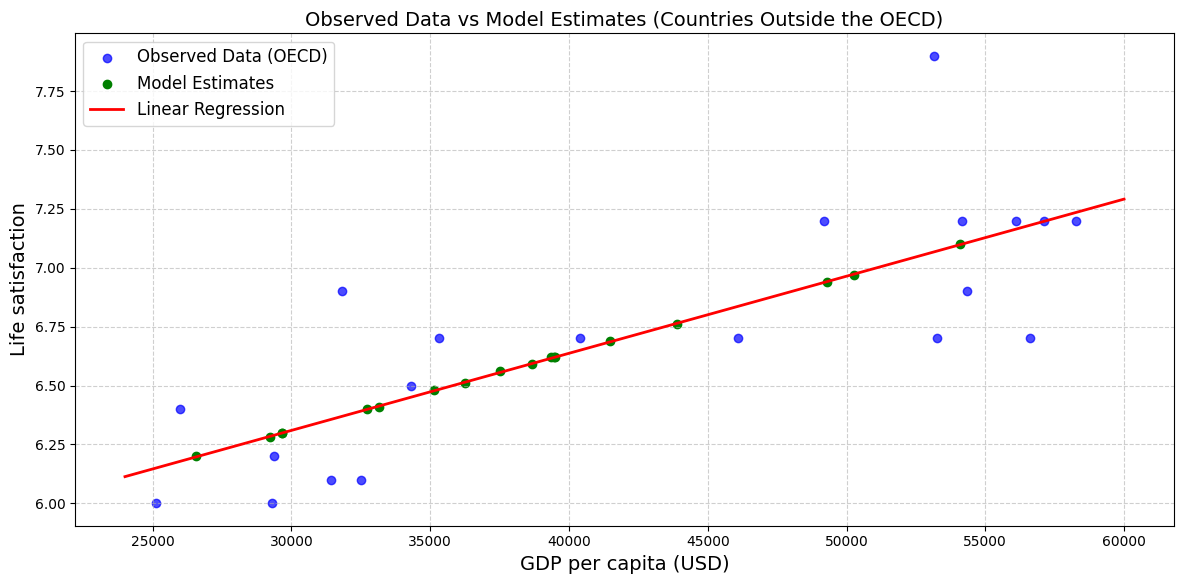

In [97]:
plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (OECD)')

plt.scatter(missing_countries_filtered['GDP per capita (USD)'], missing_countries_filtered['Predicted Life Satisfaction - Regression'], 
            color='green', marker='o', alpha=1, label='Model Estimates')

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Linear Regression')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs Model Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_regression_model_estimates_for_missing_countries_2024')
plt.show()


With data restricted to a common interval that displays a clear Satisfaction Index trend, the 18 countries with predicted values are reasonably distributed along the fitted line.


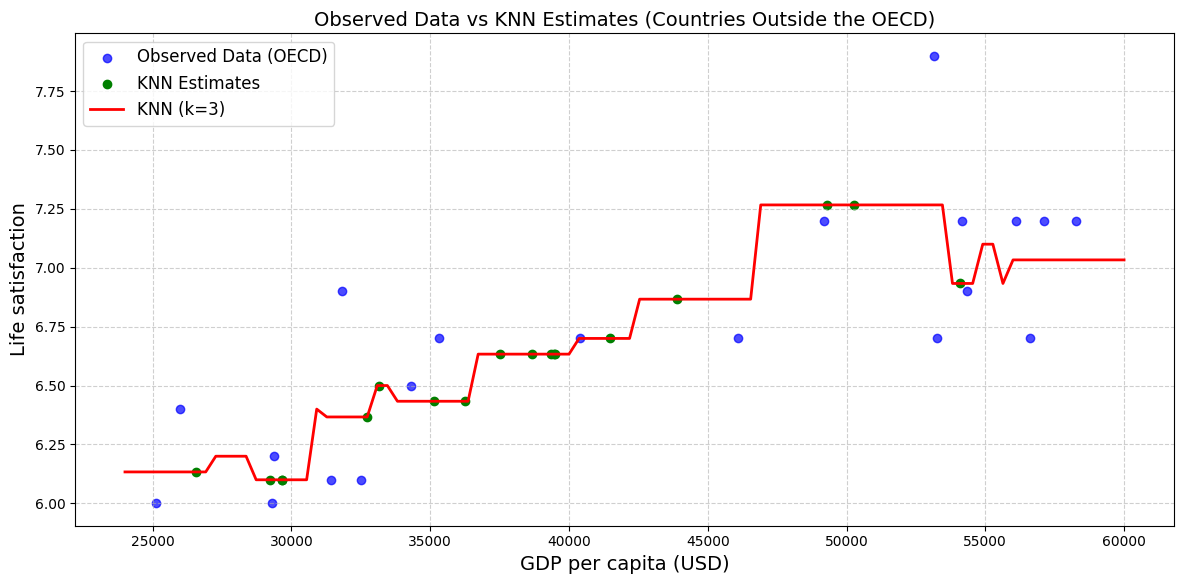

In [98]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_3 = KNeighborsRegressor(n_neighbors=3)
model_knn_3.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=3'] = (
    model_knn_3.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_3.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Observed Data (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=3'],
    color='green', marker='o', alpha=1,
    label='KNN Estimates'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=3)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs KNN Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_knn_3_estimates_for_missing_countries_2024')
plt.show()


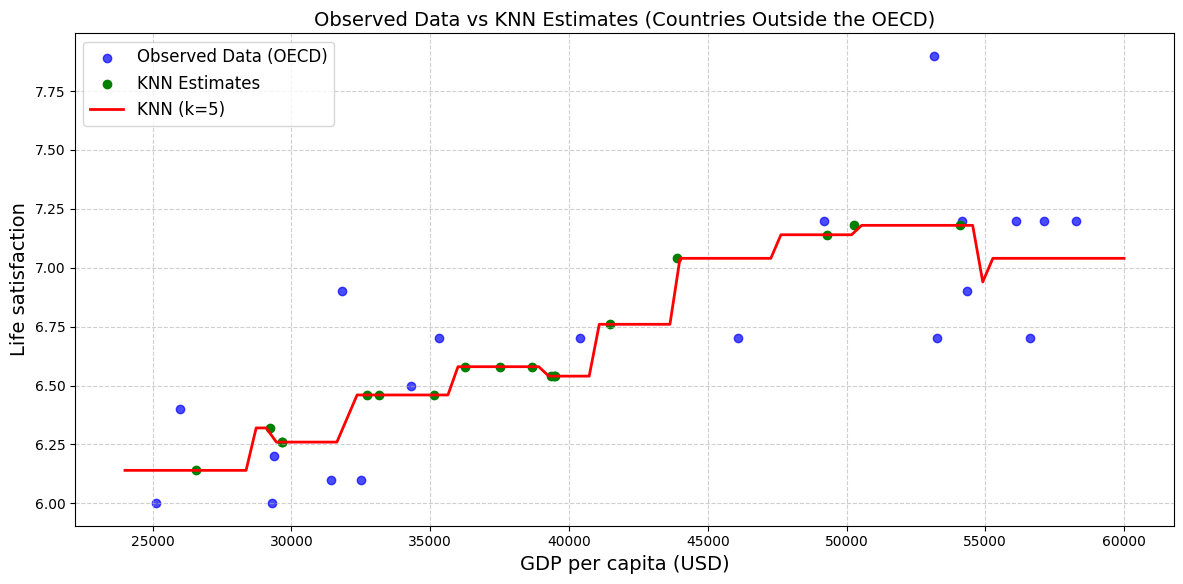

In [99]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_5 = KNeighborsRegressor(n_neighbors=5)
model_knn_5.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=5'] = (
    model_knn_5.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_5.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Observed Data (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=5'],
    color='green', marker='o', alpha=1,
    label='KNN Estimates'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=5)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs KNN Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_knn_5_estimates_for_missing_countries_2024')
plt.show()


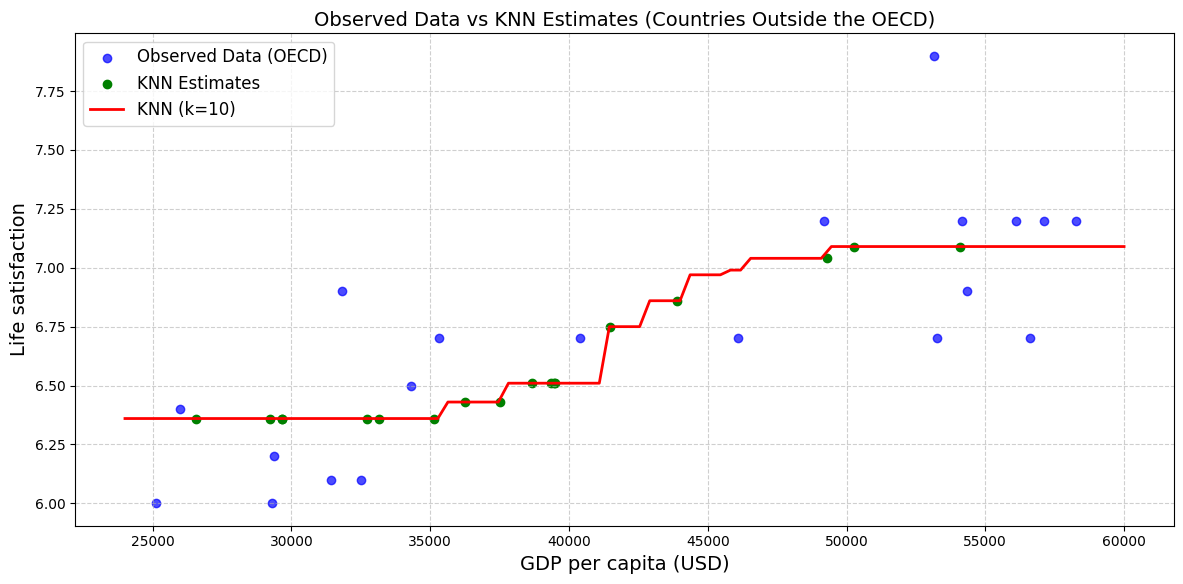

In [100]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_10 = KNeighborsRegressor(n_neighbors=10)
model_knn_10.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=10'] = (
    model_knn_10.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_10.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Observed Data (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=10'],
    color='green', marker='o', alpha=1,
    label='KNN Estimates'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=10)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs KNN Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_knn_10_estimates_for_missing_countries_2024')
plt.show()


In [101]:
diff_reg_knn_3 = (missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=3'])
diff_reg_knn_5 = missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=5']
diff_reg_knn_10 = missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=10']
missing_countries_filtered['Difference (Regression - KNN=3)'] = diff_reg_knn_3
missing_countries_filtered['Difference (Regression - KNN=5)'] = diff_reg_knn_5
missing_countries_filtered['Difference (Regression - KNN=10)'] = diff_reg_knn_10
missing_countries_filtered = missing_countries_filtered.round(2)
missing_countries_filtered.sort_values(by='GDP per capita (USD)', ascending=False)


,Entity,Code,Year,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10,Difference (Regression - KNN=3),Difference (Regression - KNN=5),Difference (Regression - KNN=10)
5663,"Hong Kong SAR, China",HKG,2024,54074.69,7.10,6.93,7.18,7.09,0.17,-0.08,0.01
13835,United Arab Emirates,ARE,2024,50273.51,6.97,7.27,7.18,7.09,-0.30,-0.21,-0.12
339,Andorra,AND,2024,49303.65,6.94,7.27,7.14,7.04,-0.33,-0.20,-0.10
8472,Malta,MLT,2024,43898.58,6.76,6.87,7.04,6.86,-0.11,-0.28,-0.10
11776,Sint Maarten (Dutch part),SXM,2024,41472.59,6.69,6.70,6.76,6.75,-0.01,-0.07,-0.06
635,Aruba,ABW,2024,39498.59,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
865,"Bahamas, The",BHS,2024,39455.45,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
11073,Puerto Rico (US),PRI,2024,39343.72,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
3023,Cyprus,CYP,2024,38674.29,6.59,6.63,6.58,6.51,-0.04,0.01,0.08
13623,Turks and Caicos Islands,TCA,2024,37506.78,6.56,6.63,6.58,6.43,-0.07,-0.02,0.13


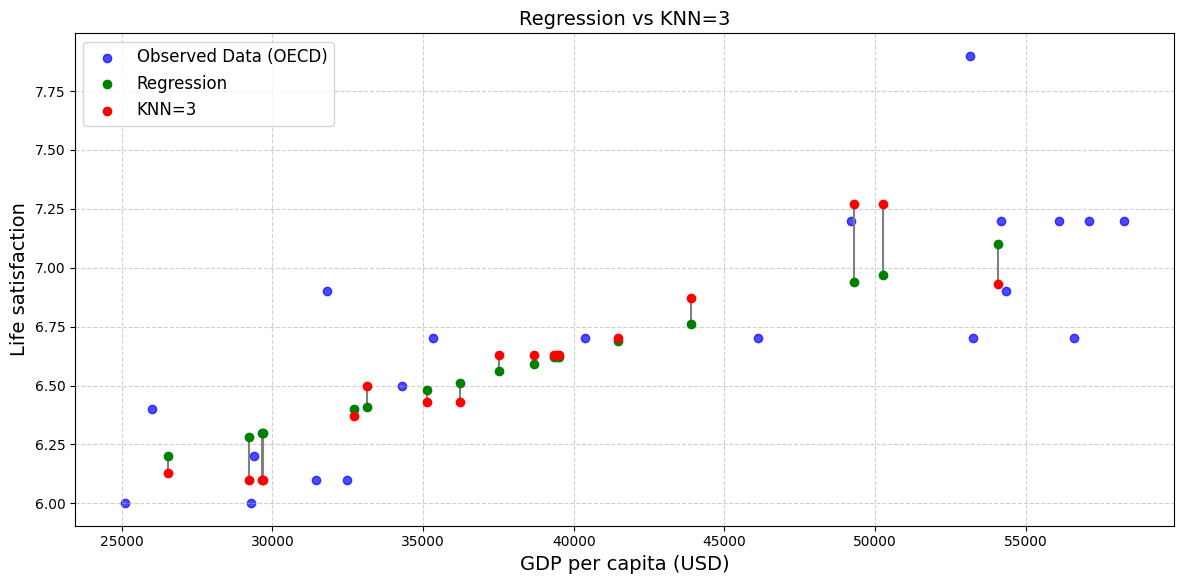

In [102]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Observed Data (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=3']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regression')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='red', zorder=5, label='KNN=3')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regression vs KNN=3')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_3_estimates_for_missing_countries_2024')
plt.tight_layout()
plt.show()


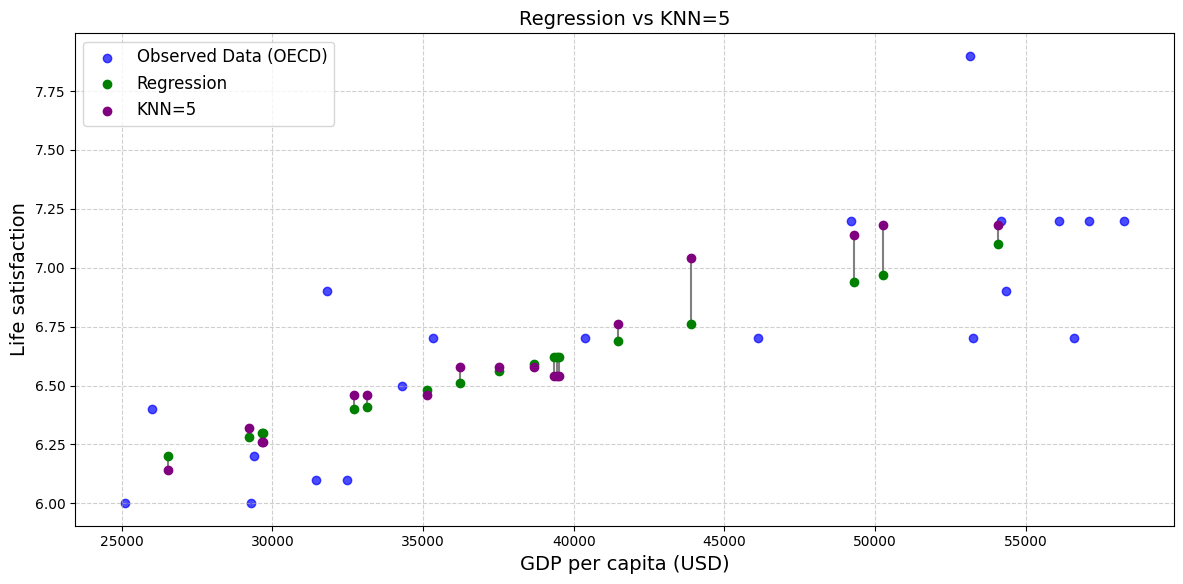

In [103]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Observed Data (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=5']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regression')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='purple', zorder=5, label='KNN=5')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regression vs KNN=5')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_5_estimates_for_missing_countries_2024')
plt.tight_layout()
plt.show()


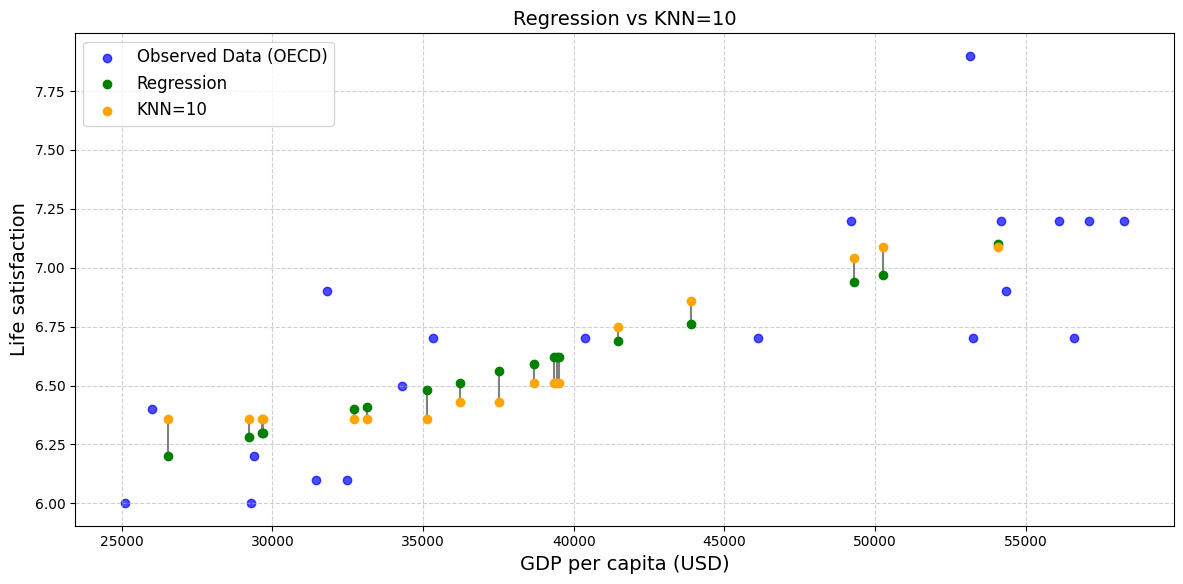

In [104]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Observed Data (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=10']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regression')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, label='KNN=10')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regression vs KNN=10')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_10_estimates_for_missing_countries_2024')
plt.tight_layout()
plt.show()


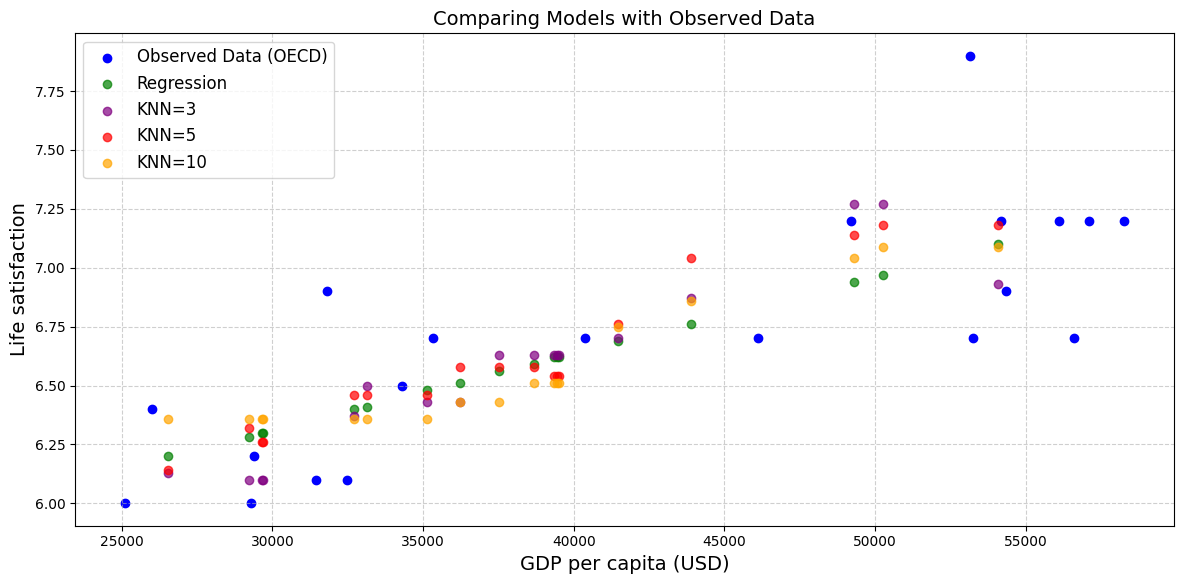

In [105]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', label='Observed Data (OECD)')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, alpha=0.7, label='Regression')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='purple', zorder=5, alpha=0.7, label='KNN=3')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='red', zorder=5, alpha=0.7, label='KNN=5')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, alpha=0.7, label='KNN=10')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Comparing Models with Observed Data')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_all_models_2024')
plt.tight_layout()
plt.show()


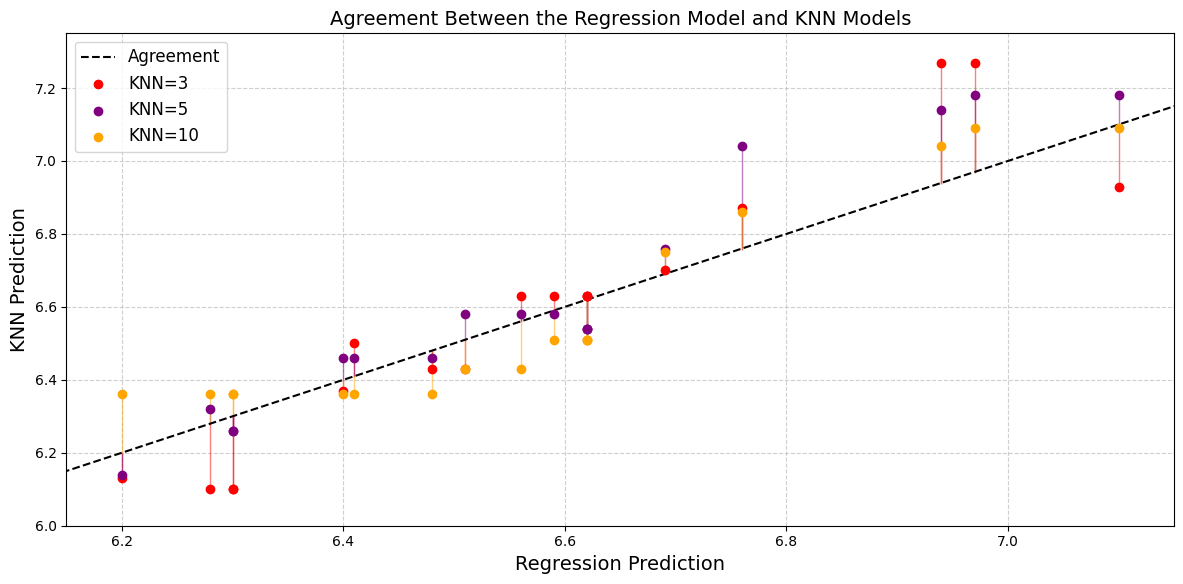

In [106]:
plt.figure(figsize=(12, 6))

reg = missing_countries_filtered['Predicted Life Satisfaction - Regression']
knn3 = missing_countries_filtered['Predicted Life Satisfaction - KNN=3']
knn5 = missing_countries_filtered['Predicted Life Satisfaction - KNN=5']
knn10 = missing_countries_filtered['Predicted Life Satisfaction - KNN=10']

lims = [6.0, 7.5]

for r, k3, k5, k10 in zip(reg, knn3, knn5, knn10):
    plt.plot([r, r], [r, k3], color='red', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k5], color='purple', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k10], color='orange', linewidth=1, alpha=0.5)

plt.plot(lims, lims, 'k--', label='Agreement')

plt.scatter(reg, knn3, color='red', zorder=5, label='KNN=3')
plt.scatter(reg, knn5, color='purple', zorder=5, label='KNN=5')
plt.scatter(reg, knn10, color='orange', zorder=5, label='KNN=10')

plt.xlim(6.15,7.15)
plt.ylim(6,7.35)
plt.xlabel('Regression Prediction')
plt.ylabel('KNN Prediction')
plt.title('Agreement Between the Regression Model and KNN Models')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_agreement_2024')
plt.tight_layout()
plt.show()


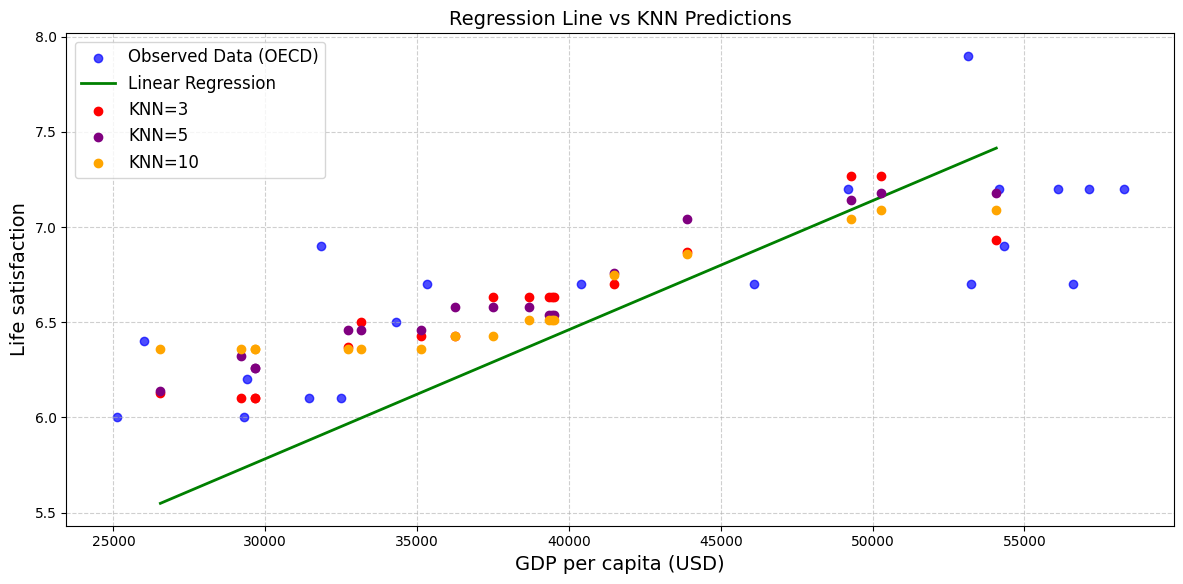

In [107]:
t0 = model.intercept_
t1 = model.coef_[0]

df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

plt.figure(figsize=(12, 6))
plt.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Observed Data (OECD)')

X_line = np.linspace(df_sorted['GDP per capita (USD)'].min(), df_sorted['GDP per capita (USD)'].max(), 1000)
plt.plot(X_line, t0 + t1 * X_line, 'g-', linewidth=2, label='Linear Regression')

plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='red', zorder=5, label='KNN=3')
plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='purple', zorder=5, label='KNN=5')
plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, label='KNN=10')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Regression Line vs KNN Predictions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_line_and_knn_predictions_2024')
plt.tight_layout()
plt.show()


Comparing KNN and linear regression indicates greater variation at the distribution tails relative to the regression line. This should not be interpreted as model failure: linear regression provides a global fit, whereas KNN estimates locally from neighborhood structure. Because the training data contain relatively few countries in the middle interval (US$35,000-US$50,000), KNN adaptation is weaker in that region.

A deeper inspection suggests that KNN = 10 outperforms KNN = 3. Nevertheless, with only 20 countries in the training set, this configuration may reflect `overfitting`, since predictions depend on half of the available observations (10 neighbors).

KNN = 5 offers the best trade-off for the available sample size. Relative to KNN = 3, it remains closer to the regression trend at the tails without clear signs of `overfitting`.


## Assessing the Models' Generalization Capacity


In [108]:
missing_countries = gdp_pc[~gdp_pc['Entity'].isin(df['Country'])]
print(f"Total missing countries in selected range: {len(missing_countries)}")

X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predictions generated for {len(results)} countries.")
results


Total missing countries in selected range: 169
Predictions generated for 169 countries.


,Entity,GDP per capita (USD),Predicted Life Satisfaction
9126,Monaco,288001.433369,14.75
1345,Bermuda,142855.374714,10.00
8086,Luxembourg,137781.681659,9.84
6428,Ireland,112894.953241,9.02
12990,Switzerland,103998.186686,8.73
...,...,...,...
2667,"Congo, Dem. Rep.",649.383339,5.35
12023,"Somalia, Fed. Rep.",629.538899,5.35
8194,Madagascar,544.987501,5.35
8239,Malawi,522.570394,5.35


Predictions generated for 169 countries.


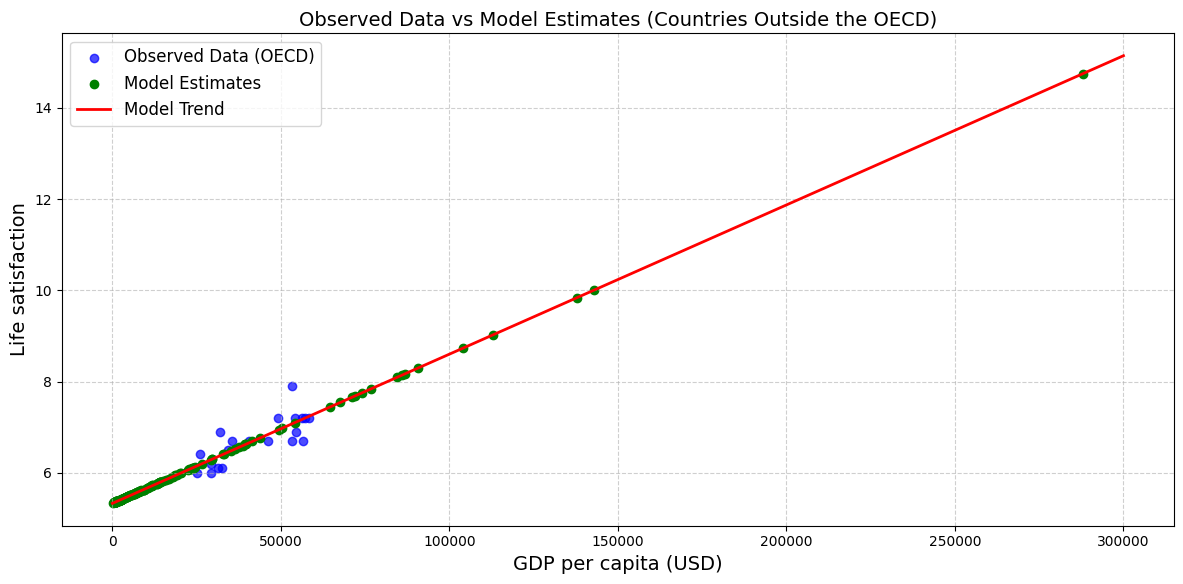

In [110]:
missing_countries = gdp_countries[~gdp_countries['Entity'].isin(df['Country'])]
X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predictions generated for {len(results)} countries.")

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (OECD)')

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Model Estimates')

X_range = np.linspace(0, 300000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Model Trend')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs Model Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_regression_model_estimates_for_missing_countries_full_range_2024')
plt.show()


As indicated in the exploratory analysis, Monaco is a clear outlier.

Accordingly, we repeat the analysis excluding this observation.


Predictions generated for 168 countries.


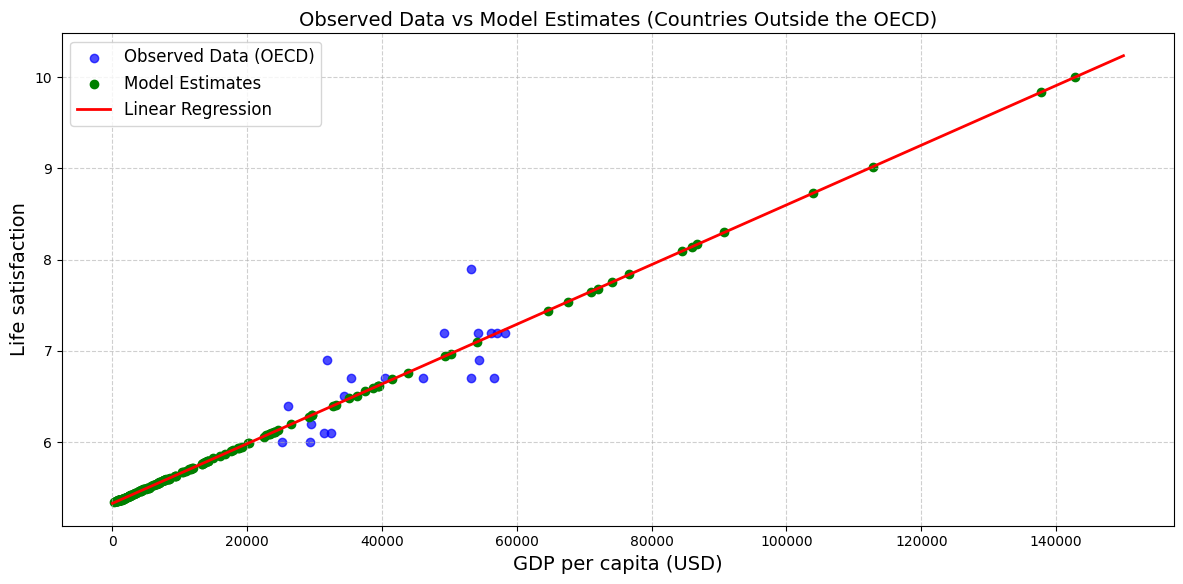

In [111]:
missing_countries = gdp_countries[~gdp_countries['Entity'].isin(df['Country'])]
missing_countries = missing_countries[missing_countries['Entity'] != 'Monaco']
X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predictions generated for {len(results)} countries.")

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (OECD)')

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Model Estimates')

X_range = np.linspace(0, 150000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Linear Regression')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs Model Estimates (Countries Outside the OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_regression_model_estimates_for_missing_countries_excluding_monaco_2024')
plt.tight_layout()
plt.show()


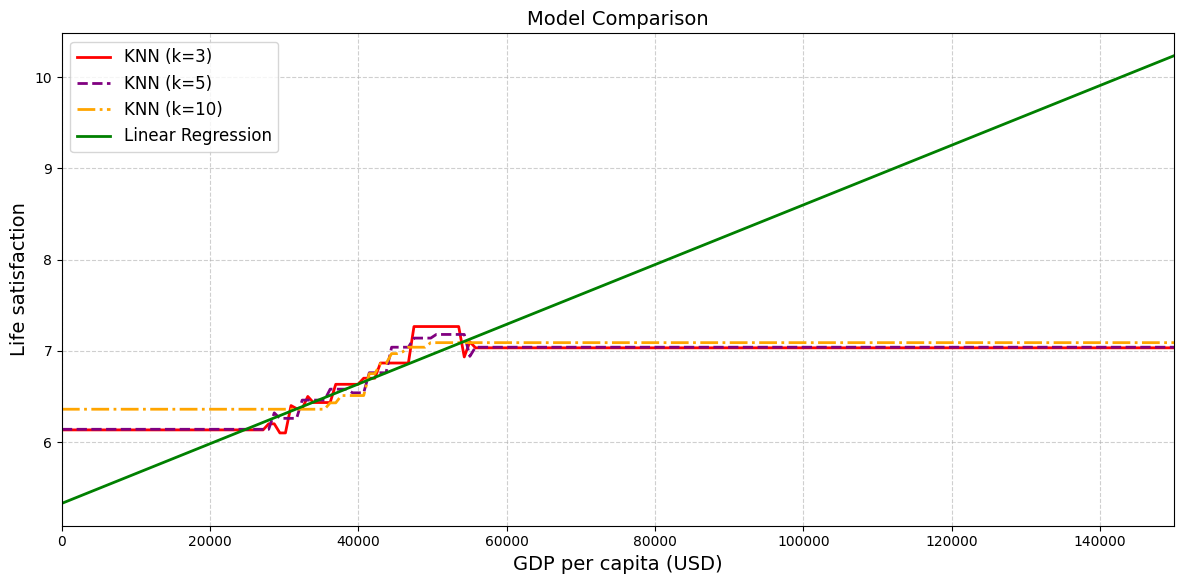

In [112]:

plt.figure(figsize=(12, 6))

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)
        
    plt.plot(X_range, model_k.predict(X_range), 
             color=color, linewidth=2, linestyle=style,
             label=f'KNN (k={k})')

plt.plot(X_range, model_regression.predict(X_range), color='green', linewidth=2, label='Linear Regression')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Model Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 150000)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_models_full_range_2024')
plt.tight_layout()
plt.show()


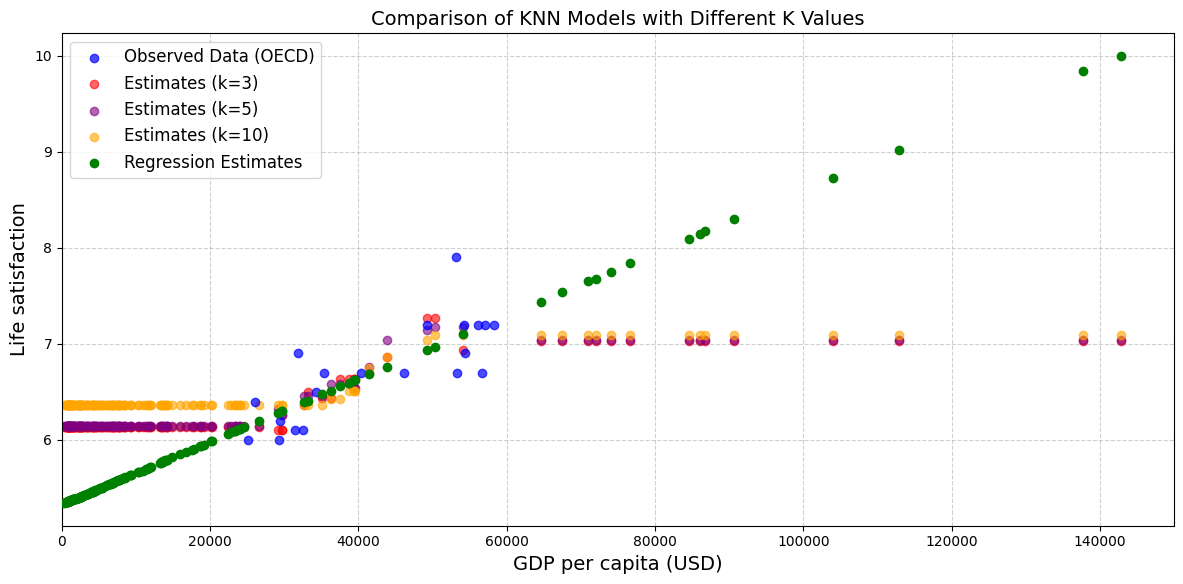

In [113]:

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (OECD)', zorder=3)

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)

    missing_countries[f'Pred_k{k}'] = model_k.predict(X_countries)

    plt.scatter(missing_countries['GDP per capita (USD)'], 
                missing_countries[f'Pred_k{k}'], 
                color=color, marker='o', alpha=0.6, 
                label=f'Estimates (k={k})', zorder=2)

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Regression Estimates', zorder=4)


plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Comparison of KNN Models with Different K Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 150000)
save_fig('lifesat_gdp_scatterplot_comparing_knn_models_with_different_k_values_2024')
plt.tight_layout()
plt.show()


This result reinforces the importance of data quality and representativeness: regardless of model choice or hyperparameter configuration, one cannot reliably infer outcomes for more than 200 countries from a training basis of only 20 countries.


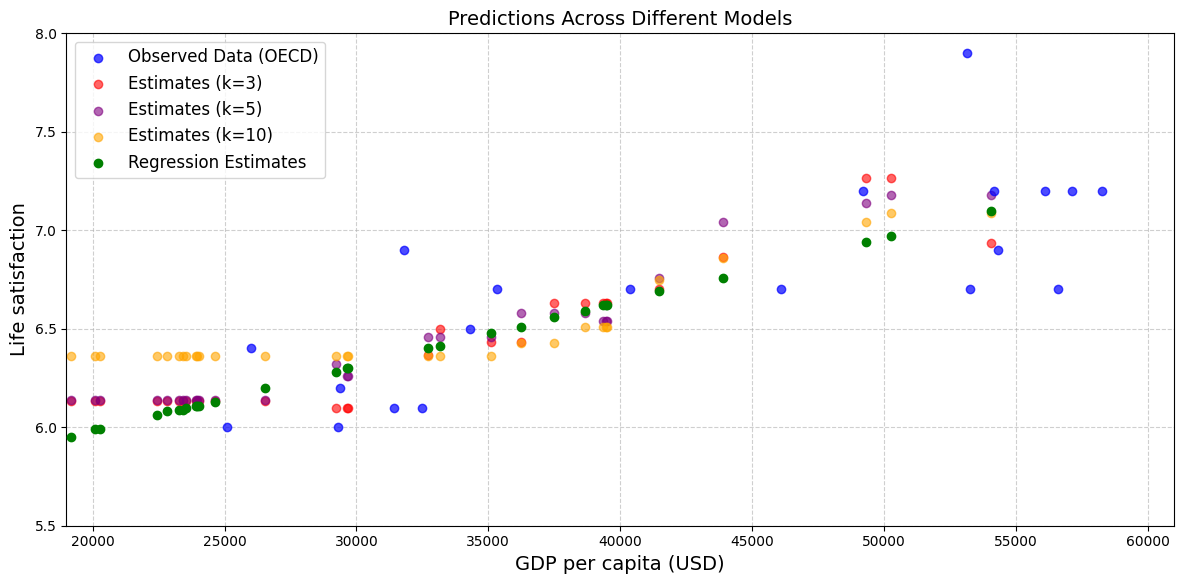

In [114]:

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (OECD)', zorder=3)

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)

    missing_countries[f'Pred_k{k}'] = model_k.predict(X_countries)

    plt.scatter(missing_countries['GDP per capita (USD)'], 
                missing_countries[f'Pred_k{k}'], 
                color=color, marker='o', alpha=0.6, 
                label=f'Estimates (k={k})', zorder=2)

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Regression Estimates', zorder=4)


plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Predictions Across Different Models')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(19000, 61000)
plt.ylim(5.5, 8)
save_fig('lifesat_gdp_scatterplot_comparing_all_models_focused_range_2024')
plt.tight_layout()
plt.show()


When evaluation is restricted to the GDP interval represented in the training data, the true comparative behavior of each model becomes more evident.


## Training with All Available Countries


In the final stage of this study, we train models using all OECD-available countries. To partially address representativeness concerns, we filter the complementary dataset to countries within a GDP interval comparable to the OECD-covered range.


In [115]:
print(f"Total countries with data in OECD dataset: {len(df_raw)}")
print(f"Minimum GDP per capita (USD) among countries with Satisfaction data: U${df_raw['GDP per capita (USD)'].min():,.2f}")
print(f"Maximum GDP per capita (USD) among countries with Satisfaction data: U${df_raw['GDP per capita (USD)'].max():,.2f}")
df_raw.describe()


Total countries with data in OECD dataset: 37
Minimum GDP per capita (USD) among countries with Satisfaction data: U$7,919.21
Maximum GDP per capita (USD) among countries with Satisfaction data: U$137,781.68


,Life satisfaction,GDP per capita (USD)
count,37.000000,37.000000
mean,6.729730,48866.928077
std,0.591545,29806.539967
min,5.700000,7919.208868
25%,6.200000,25992.674850
50%,6.700000,46103.084086
75%,7.200000,58268.878765
max,7.900000,137781.681659


Filtering the GDP dataset using the OECD GDP interval.

The minimum value adopted is US$5,000.00 and the maximum is US$150,000.00.


In [116]:
gdp_countries_filtered = gdp_countries[
    (gdp_countries['GDP per capita (USD)'] > 5000) &
    (gdp_countries['GDP per capita (USD)'] < 150000)
    ].sort_values(by='GDP per capita (USD)', ascending=False)
gdp_countries_filtered


,Entity,Code,Year,GDP per capita (USD)
1345,Bermuda,BMU,2024,142855.374714
8086,Luxembourg,LUX,2024,137781.681659
6428,Ireland,IRL,2024,112894.953241
12990,Switzerland,CHE,2024,103998.186686
11760,Singapore,SGP,2024,90674.066633
...,...,...,...,...
3725,El Salvador,SLV,2024,5579.659692
11323,Samoa,WSM,2024,5392.877619
13780,Ukraine,UKR,2024,5389.473145
1909,Cabo Verde,CPV,2024,5192.481573


In [117]:
missing_countries_filtered = gdp_countries_filtered[~gdp_countries_filtered['Entity'].isin(df_raw['Country'])]
print(f"Total missing countries in selected range: {len(missing_countries_filtered)}")
missing_countries_filtered.describe()


Total missing countries in selected range: 83


,Year,GDP per capita (USD)
count,83.0,83.000000
mean,2024.0,22126.740398
std,0.0,22533.626737
min,2024.0,5190.169590
25%,2024.0,7688.498600
50%,2024.0,13609.158838
75%,2024.0,29433.380296
max,2024.0,142855.374714


### Training Models with the Full Dataset


At this stage, we have 37 countries for model training and 83 countries for prediction.


In [118]:
X_full = df_raw[['GDP per capita (USD)']].values
y_full = df_raw[['Life satisfaction']].values


regression_full = LinearRegression()
regression_full.fit(X_full, y_full)

knn_3_full = KNeighborsRegressor(n_neighbors=3)
knn_3_full.fit(X_full, y_full)

knn_5_full = KNeighborsRegressor(n_neighbors=5)
knn_5_full.fit(X_full, y_full)

knn_10_full = KNeighborsRegressor(n_neighbors=15)
knn_10_full.fit(X_full, y_full)

print("Models trained on the full dataset (all countries with Satisfaction data)")


Models trained on the full dataset (all countries with Satisfaction data)


In [119]:
full_countries_predictions = missing_countries_filtered[['Entity', 'GDP per capita (USD)']].round(2).copy()

full_countries_predictions['Predicted Life Satisfaction - Regression'] = regression_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=3'] = knn_3_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=5'] = knn_5_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=10'] = knn_10_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
print(f"Predictions generated for {len(full_countries_predictions)} countries using the full dataset.")
full_countries_predictions.sort_values(by='GDP per capita (USD)', ascending=False).head()


Predictions generated for 83 countries using the full dataset.


,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10
1345,Bermuda,142855.37,8.16,7.37,7.42,7.22
11760,Singapore,90674.07,7.36,7.30,7.36,7.17
11128,Qatar,76688.69,7.15,7.27,7.36,7.21
4298,Faroe Islands,74119.66,7.11,7.30,7.32,7.20
8129,"Macao SAR, China",72004.74,7.08,7.30,7.20,7.20


In [120]:
diff_reg_knn_3_full = (full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=3'])
diff_reg_knn_5_full = full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=5']
diff_reg_knn_10_full = full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=10']
full_countries_predictions['Difference (Regression - KNN=3)'] = diff_reg_knn_3_full
full_countries_predictions['Difference (Regression - KNN=5)'] = diff_reg_knn_5_full
full_countries_predictions['Difference (Regression - KNN=10)'] = diff_reg_knn_10_full
full_countries_predictions = full_countries_predictions.round(2)
full_countries_predictions.sort_values(by='GDP per capita (USD)', ascending=False).head(10)


,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10,Difference (Regression - KNN=3),Difference (Regression - KNN=5),Difference (Regression - KNN=10)
1345,Bermuda,142855.37,8.16,7.37,7.42,7.22,0.79,0.74,0.94
11760,Singapore,90674.07,7.36,7.30,7.36,7.17,0.06,0.00,0.19
11128,Qatar,76688.69,7.15,7.27,7.36,7.21,-0.12,-0.21,-0.06
4298,Faroe Islands,74119.66,7.11,7.30,7.32,7.20,-0.19,-0.21,-0.09
8129,"Macao SAR, China",72004.74,7.08,7.30,7.20,7.20,-0.22,-0.12,-0.12
5663,"Hong Kong SAR, China",54074.69,6.81,6.93,7.18,7.08,-0.12,-0.37,-0.27
13835,United Arab Emirates,50273.51,6.75,7.27,7.18,7.01,-0.52,-0.43,-0.26
339,Andorra,49303.65,6.74,7.27,7.14,6.93,-0.53,-0.40,-0.19
8472,Malta,43898.58,6.65,6.87,7.04,6.85,-0.22,-0.39,-0.20
11776,Sint Maarten (Dutch part),41472.59,6.62,6.70,6.76,6.73,-0.08,-0.14,-0.11


<Figure size 1200x600 with 0 Axes>

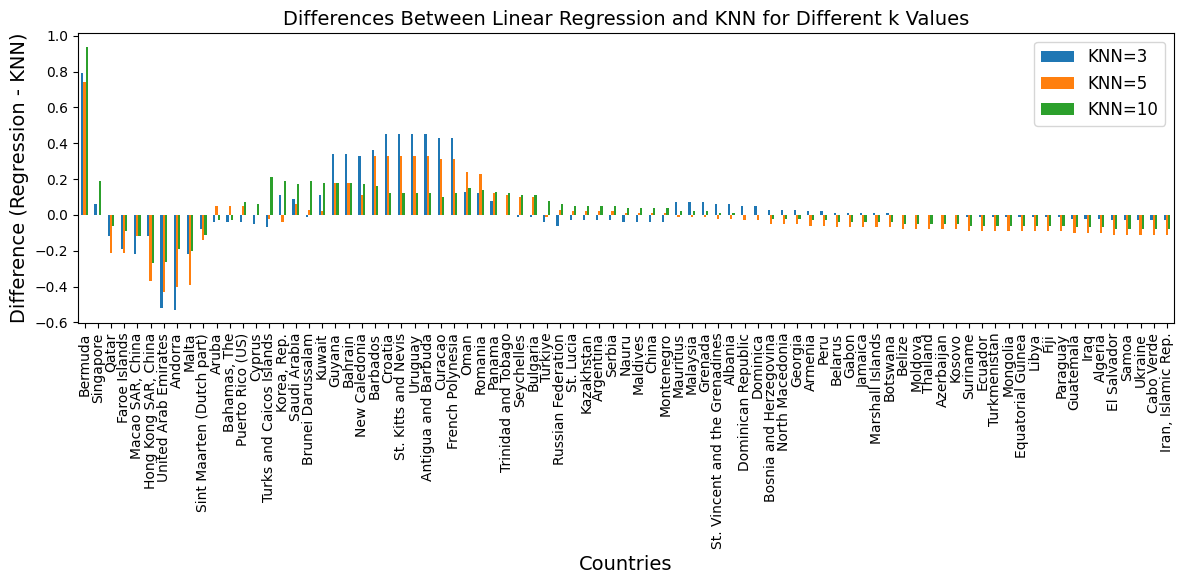

In [121]:
df_diff = full_countries_predictions[['Entity', 'GDP per capita (USD)', 'Difference (Regression - KNN=3)', 'Difference (Regression - KNN=5)', 'Difference (Regression - KNN=10)']].copy()
df_diff = df_diff.sort_values(by='GDP per capita (USD)', ascending=False)

plt.figure(figsize=(12, 6))
df_diff[['Difference (Regression - KNN=3)', 'Difference (Regression - KNN=5)', 'Difference (Regression - KNN=10)']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Countries')
plt.ylabel('Difference (Regression - KNN)')
plt.xticks(ticks=range(len(df_diff)), labels=df_diff['Entity'], rotation=90)
plt.title('Differences Between Linear Regression and KNN for Different k Values')
plt.legend(['KNN=3', 'KNN=5', 'KNN=10'])
save_fig('lifesat_gdp_bar_chart_comparing_regression_and_knn_differences_2024')
plt.tight_layout()
plt.show()


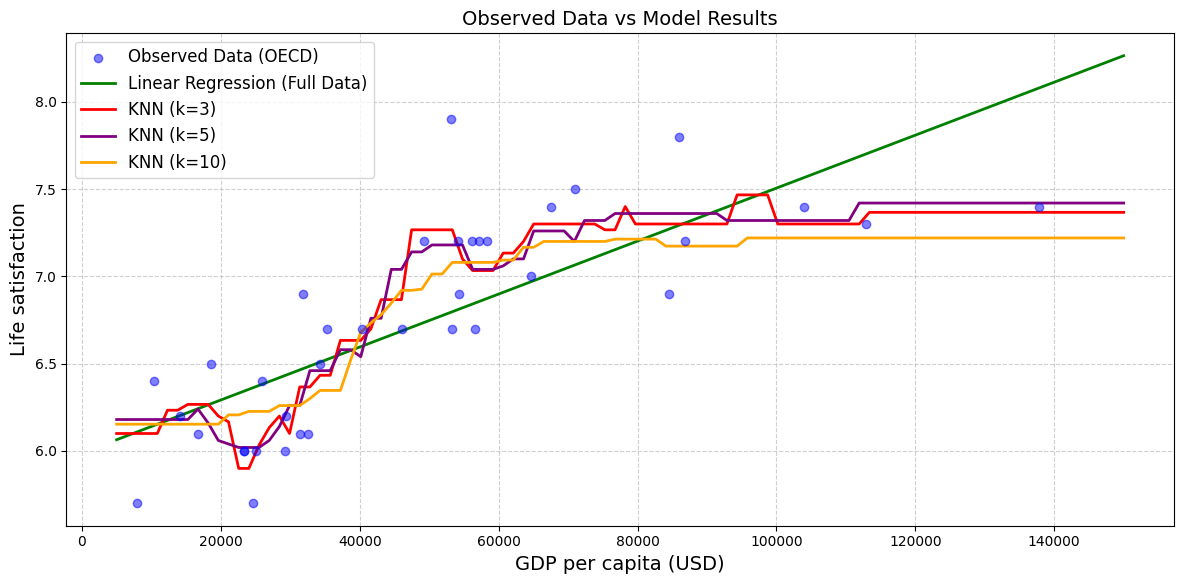

In [122]:
plt.figure(figsize=(12, 6))

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'],
            color='blue', alpha=0.5, label='Observed Data (OECD)', zorder=3)

X_range = np.linspace(5000, 150000, 100).reshape(-1, 1)

plt.plot(X_range, regression_full.predict(X_range), color='green', linewidth=2, label='Linear Regression (Full Data)')
plt.plot(X_range, knn_3_full.predict(X_range), color='red', linewidth=2, label='KNN (k=3)')
plt.plot(X_range, knn_5_full.predict(X_range), color='purple', linewidth=2, label='KNN (k=5)')
plt.plot(X_range, knn_10_full.predict(X_range), color='orange', linewidth=2, label='KNN (k=10)')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Observed Data vs Model Results')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_all_models_full_data_2024')
plt.tight_layout()
plt.show()


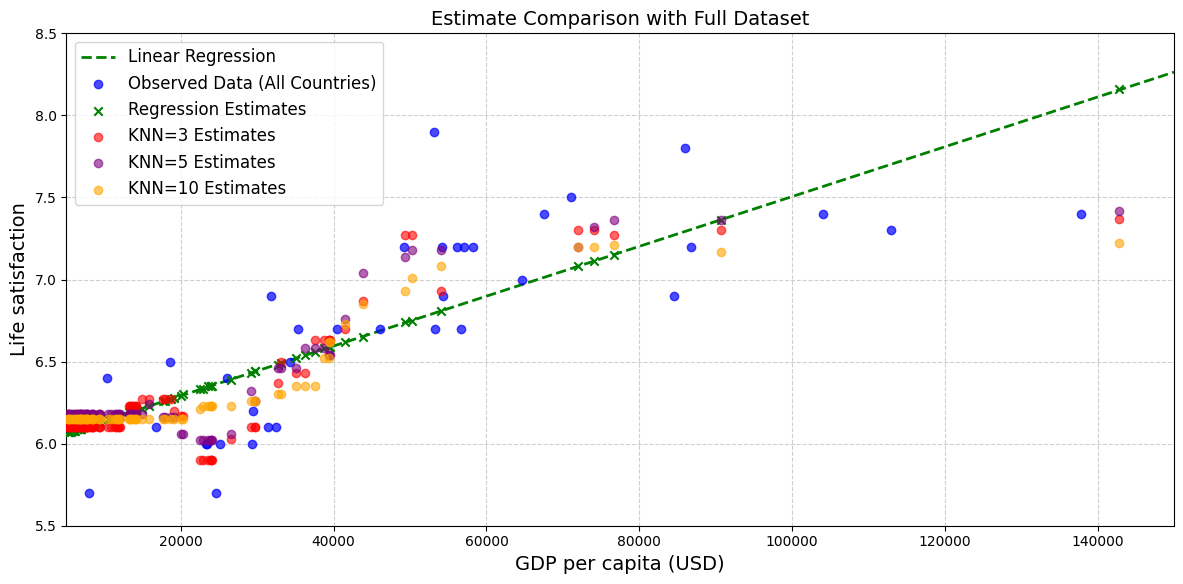

In [123]:
plt.figure(figsize=(12, 6))

X_range = np.linspace(5000, 150000, 100).reshape(-1, 1)
plt.plot(X_range, regression_full.predict(X_range), color='green', linewidth=2, linestyle='--',label='Linear Regression')

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (All Countries)', zorder=3)

plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - Regression'], 
            color='green', marker='x', alpha=1, label='Regression Estimates', zorder=4)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=3'], 
            color='red', marker='o', alpha=0.6, label='KNN=3 Estimates', zorder=5)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=5'], 
            color='purple', marker='o', alpha=0.6, label='KNN=5 Estimates', zorder=5)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=10'], 
            color='orange', marker='o', alpha=0.6, label='KNN=10 Estimates', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Estimate Comparison with Full Dataset')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(5000, 150000)
plt.ylim(5.5, 8.5)
save_fig('lifesat_gdp_scatterplot_comparing_full_data_estimates_2024')
plt.tight_layout()
plt.show()


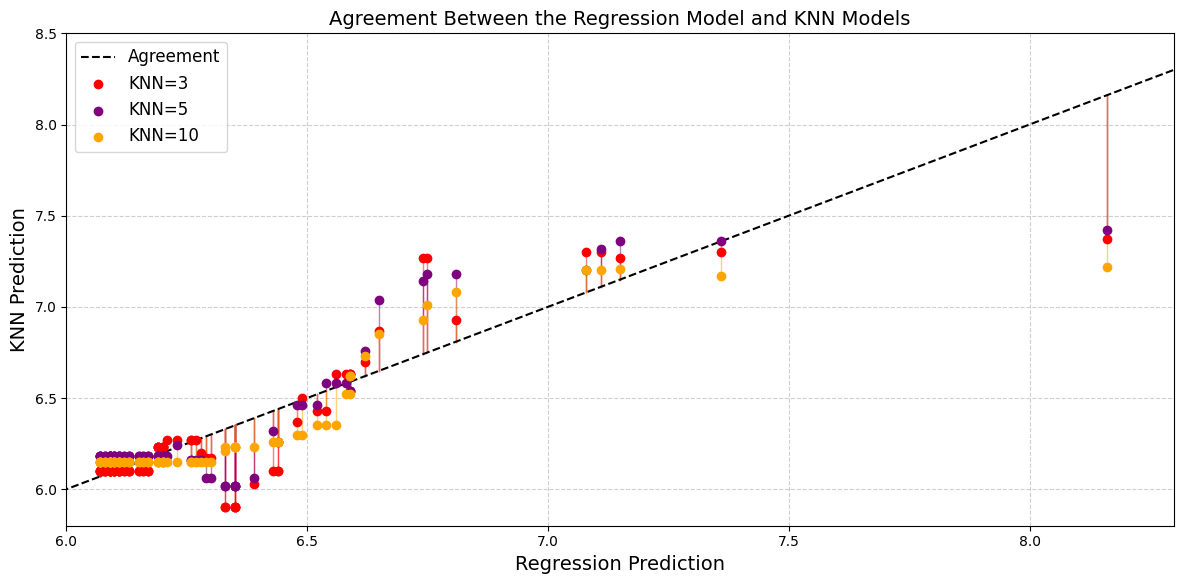

In [124]:
plt.figure(figsize=(12, 6))

reg = full_countries_predictions['Predicted Life Satisfaction - Regression']
knn3 = full_countries_predictions['Predicted Life Satisfaction - KNN=3']
knn5 = full_countries_predictions['Predicted Life Satisfaction - KNN=5']
knn10 = full_countries_predictions['Predicted Life Satisfaction - KNN=10']

lims = [5.0, 8.5]

for r, k3, k5, k10 in zip(reg, knn3, knn5, knn10):
    plt.plot([r, r], [r, k3], color='red', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k5], color='purple', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k10], color='orange', linewidth=1, alpha=0.5)

plt.plot(lims, lims, 'k--', label='Agreement')

plt.scatter(reg, knn3, color='red', zorder=5, label='KNN=3')
plt.scatter(reg, knn5, color='purple', zorder=5, label='KNN=5')
plt.scatter(reg, knn10, color='orange', zorder=5, label='KNN=10')

plt.xlim(6, 8.3)
plt.ylim(5.8, 8.5)
plt.xlabel('Regression Prediction')
plt.ylabel('KNN Prediction')
plt.title('Agreement Between the Regression Model and KNN Models')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparing_regression_and_knn_agreement_full_data_2024')
plt.tight_layout()
plt.show()


Among the evaluated configurations, K = 10 produced strong results when predicting countries' Satisfaction Index values. Its predictions were comparatively stable against linear regression, except for the final country in the ordered range, which motivates the discussion in the next section.


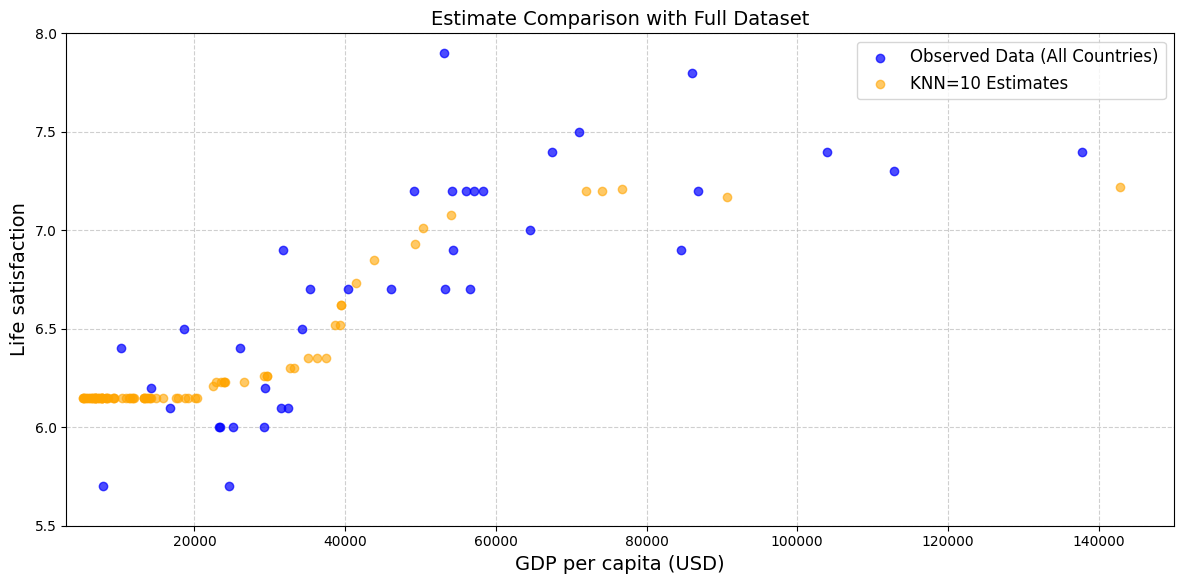

In [125]:
plt.figure(figsize=(12, 6))

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'], 
            color='blue', alpha=0.7, label='Observed Data (All Countries)', zorder=3)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=10'], 
            color='orange', marker='o', alpha=0.6, label='KNN=10 Estimates', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Estimate Comparison with Full Dataset')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(3000, 150000)
plt.ylim(5.5, 8)
save_fig('lifesat_gdp_scatterplot_comparing_knn_10_estimates_full_data_2024')
plt.tight_layout()
plt.show()


In [ ]:
df_raw.loc[df_raw['GDP per capita (USD)'].idxmax()]


Country                    Luxembourg
Life satisfaction                 7.4
GDP per capita (USD)    137781.681659
Name: 23, dtype: object

In [ ]:
df_raw.loc[df_raw['Life satisfaction'].idxmax()]


Country                      Finland
Life satisfaction                7.9
GDP per capita (USD)    53149.767193
Name: 11, dtype: object

The joint distribution of observed and estimated values suggests a diminishing-return pattern: beyond a certain GDP per capita level, population satisfaction no longer increases proportionally to wealth.

Luxembourg, despite having the highest GDP per capita, does not exhibit a satisfaction level as high as Finland, whose GDP per capita is less than half of Luxembourg's.

In this study, linear regression served as a useful baseline but did not provide strong general-purpose performance. KNN adapted better to local structure and produced more plausible estimates.

Because the dataset suffers from representativeness imbalance, with many observations concentrated in a narrow interval and limited coverage of very high- and very low-income countries, both simple linear regression and KNN may fail as broadly generalizable models when country-specific structural differences are ignored.

A natural next step is to evaluate multiple linear regression with additional OECD variables and combine it with clustering methods to group countries by similar socioeconomic profiles rather than GDP per capita alone.
